# Proyecto Dataset Scrapy
## Análisis Página Web www.allitbooks.org

### Jorge Trujillo

#### Introducción

Se busca analizar los libros contenidos en el sitio www.allitbooks.org, recolectando los datos con `Scrapy`.

##### Dataset

Se analizaron los libros pertenecientes a las primeras 300 páginas del sitio web, a fecha 29 de Septiembre de 2020, lo que representa un total de 3000 libros analizados. No se analizó todo el sitio por cuestion de tiempo pues analizar los mas de 8000 libros tomaba demasiado tiempo.

Los datos obtenidos fueron:

- `nombre` - Nombre del libro
- `autor` - Nombre del autor del libro. En caso de tener mas de un autor solo se tomó el primero.
- `isbn-10` - ISBN-10 del libro
- `paginas` - Número de páginas del archivo del libro.
- `lenguaje` - Idioma en el que se encuentra el texto
- `tamanio` - Tamaño del archivo. La página muestra el tamaño del primer formato en que se encuentra disponible.
- `formatos` - Tipos de formato en que se encuentran los archivos subidos.
- `categoria` - Categoría a la que pertenece el libro.

In [3]:
import scrapy
from scrapy.spiders import CSVFeedSpider,CrawlSpider, Rule
from scrapy.crawler import CrawlerProcess
from scrapy.linkextractors import LinkExtractor
from scrapy.crawler import CrawlerRunner
import pandas as pd
import numpy as np
rutas = []
all = []

In [2]:
class AraniaCrawl(CrawlSpider):
    name = 'crawl' #Heredado
    
    allowed_domains = [ #Heredado
        'allitebooks.org'
    ]
    
    start_urls = [
        'http://www.allitebooks.org',
    ]
    
    for i in range(1, 300):
        start_urls.append(
            f'http://www.allitebooks.org/page/{i}/')
    
    segmentos_url_permitidos = (
        'page'
    )

    regla_dos = (
        Rule(
            LinkExtractor(
                allow_domains = allowed_domains,
                allow = segmentos_url_permitidos
            ), callback='parse_page'
        ),
        # Parametro Vacio
    )

    rules = regla_dos #heredada
    
    def parse_page(self, response):
        lista_programas = response.css(".entry-title a::text").extract()
        for agencia in lista_programas:
            agencia = agencia.lower()
            agencia = agencia.replace(' – ','-')
            agencia = agencia.replace(' @ ','-')
            agencia = agencia.replace(' / ','-')
            agencia = agencia.replace(' & ','-')
            agencia = agencia.replace('/','')
            agencia = agencia.replace('&','')
            agencia = agencia.replace('ASP.NET','asp-net')
            agencia = agencia.replace('ODP.NET','odp-net')
            agencia = agencia.replace(' .','-')
            agencia = agencia.replace('(','')
            agencia = agencia.replace(')','')
            agencia = agencia.replace(' ','-')
            agencia = agencia.replace('+','')
            agencia = agencia.replace(',','')
            agencia = agencia.replace('!','')
            agencia = agencia.replace('?','')
            agencia = agencia.replace('.','-')
            agencia = agencia.replace('#','')
            agencia = agencia.replace('’','')
            agencia = agencia.replace(':','')
            agencia = agencia.replace('®','')
            agencia = agencia.replace('™','')
            rutas.append(f'http://www.allitebooks.org/{agencia}')

In [3]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(AraniaCrawl)
process.start()

2020-09-29 12:31:09 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-09-29 12:31:09 [scrapy.utils.log] INFO: Versions: lxml 4.5.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.8, Platform Windows-10-10.0.19041-SP0
2020-09-29 12:31:09 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-09-29 12:31:09 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2020-09-29 12:31:09 [scrapy.extensions.telnet] INFO: Telnet Password: 73930a2e5aaecd3f
2020-09-29 12:31:09 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2020-09-29 12:31:10 [scrapy.middleware] INFO: Enabled downloader middlewares:
[

2020-09-29 12:31:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/21/> (referer: None)
2020-09-29 12:31:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/23/> (referer: None)
2020-09-29 12:31:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/22/> (referer: None)
2020-09-29 12:31:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/26/> (referer: None)
2020-09-29 12:31:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/24/> (referer: None)
2020-09-29 12:31:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/27/> (referer: None)
2020-09-29 12:31:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/25/> (referer: None)
2020-09-29 12:31:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/28/> (referer: None)
2020-09-29 12:31:18 [scrapy.core.engine]

2020-09-29 12:31:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/56/> (referer: None)
2020-09-29 12:31:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/58/> (referer: None)
2020-09-29 12:31:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/49/> (referer: http://www.allitebooks.org/page/48/)
2020-09-29 12:31:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/51/> (referer: http://www.allitebooks.org/page/49/)
2020-09-29 12:31:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/52/> (referer: http://www.allitebooks.org/page/50/)
2020-09-29 12:31:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/47/> (referer: http://www.allitebooks.org/page/46/)
2020-09-29 12:31:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/48/> (referer: http://www.allitebooks.org/page/46/)
2020-

2020-09-29 12:31:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/79/> (referer: http://www.allitebooks.org/page/77/)
2020-09-29 12:31:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/84/> (referer: None)
2020-09-29 12:31:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/83/> (referer: None)
2020-09-29 12:31:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/85/> (referer: None)
2020-09-29 12:31:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/87/> (referer: None)
2020-09-29 12:31:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/86/> (referer: None)
2020-09-29 12:31:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/88/> (referer: None)
2020-09-29 12:31:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/89/> (referer: None)
2020-09-2

2020-09-29 12:31:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/109/> (referer: http://www.allitebooks.org/page/107/)
2020-09-29 12:31:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/108/> (referer: http://www.allitebooks.org/page/106/)
2020-09-29 12:31:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/115/> (referer: None)
2020-09-29 12:31:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/113/> (referer: http://www.allitebooks.org/page/111/)
2020-09-29 12:31:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/112/> (referer: http://www.allitebooks.org/page/110/)
2020-09-29 12:31:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/110/> (referer: http://www.allitebooks.org/page/108/)
2020-09-29 12:31:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/116/> (referer:

2020-09-29 12:31:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/146/> (referer: None)
2020-09-29 12:31:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/147/> (referer: None)
2020-09-29 12:31:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/139/> (referer: http://www.allitebooks.org/page/137/)
2020-09-29 12:31:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/140/> (referer: http://www.allitebooks.org/page/138/)
2020-09-29 12:31:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/137/> (referer: http://www.allitebooks.org/page/135/)
2020-09-29 12:31:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/138/> (referer: http://www.allitebooks.org/page/136/)
2020-09-29 12:31:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/141/> (referer: http://www.allitebooks.org/page

2020-09-29 12:32:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/173/> (referer: None)
2020-09-29 12:32:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/174/> (referer: None)
2020-09-29 12:32:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/177/> (referer: None)
2020-09-29 12:32:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/176/> (referer: None)
2020-09-29 12:32:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/175/> (referer: None)
2020-09-29 12:32:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/170/> (referer: http://www.allitebooks.org/page/168/)
2020-09-29 12:32:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/179/> (referer: None)
2020-09-29 12:32:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/178/> (referer: None)


2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/200/> (referer: http://www.allitebooks.org/page/198/)
2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/204/> (referer: None)
2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/202/> (referer: http://www.allitebooks.org/page/200/)
2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/201/> (referer: http://www.allitebooks.org/page/199/)
2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/206/> (referer: None)
2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/205/> (referer: None)
2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/207/> (referer: None)
2020-09-29 12:32:09 [scrapy.core.engine] DEBUG: Crawled (

2020-09-29 12:32:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/223/> (referer: http://www.allitebooks.org/page/221/)
2020-09-29 12:32:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/229/> (referer: http://www.allitebooks.org/page/227/)
2020-09-29 12:32:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/228/> (referer: http://www.allitebooks.org/page/226/)
2020-09-29 12:32:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/226/> (referer: http://www.allitebooks.org/page/224/)
2020-09-29 12:32:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/230/> (referer: http://www.allitebooks.org/page/228/)
2020-09-29 12:32:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/231/> (referer: http://www.allitebooks.org/page/229/)
2020-09-29 12:32:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.alli

2020-09-29 12:32:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/265/> (referer: None)
2020-09-29 12:32:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/258/> (referer: http://www.allitebooks.org/page/256/)
2020-09-29 12:32:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/267/> (referer: None)
2020-09-29 12:32:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/269/> (referer: None)
2020-09-29 12:32:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/259/> (referer: http://www.allitebooks.org/page/257/)
2020-09-29 12:32:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/268/> (referer: None)
2020-09-29 12:32:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/270/> (referer: None)
2020-09-29 12:32:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks

2020-09-29 12:32:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/290/> (referer: http://www.allitebooks.org/page/289/)
2020-09-29 12:32:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/288/> (referer: http://www.allitebooks.org/page/286/)
2020-09-29 12:32:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/287/> (referer: http://www.allitebooks.org/page/285/)
2020-09-29 12:32:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/296/> (referer: None)
2020-09-29 12:32:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/298/> (referer: None)
2020-09-29 12:32:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/297/> (referer: None)
2020-09-29 12:32:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/page/292/> (referer: http://www.allitebooks.org/page/290/)
2020-09-29 12:32:36 [scra

In [4]:
df_rutes = pd.DataFrame({"foo": rutas})
df_rutes.to_pickle('./rutas.pickle')

In [109]:
df2 = pd.read_pickle('./rutas.pickle')
df2

,foo
0,http://www.allitebooks.org/the-modern-data-war...
1,http://www.allitebooks.org/beginning-apache-sp...
2,http://www.allitebooks.org/articulate-storylin...
3,http://www.allitebooks.org/django-standalone-apps
4,http://www.allitebooks.org/pro-asp-net-core-3-...
...,...
3005,http://www.allitebooks.org/quantitative-evalua...
3006,http://www.allitebooks.org/social-network-base...
3007,http://www.allitebooks.org/dense-image-corresp...
3008,http://www.allitebooks.org/hello-raspberry-pi


In [3]:
df2['foo'][:10].array

<PandasArray>
[                                    'http://www.allitebooks.org/the-modern-data-warehouse-in-azure',
                          'http://www.allitebooks.org/beginning-apache-spark-using-azure-databricks',
                                        'http://www.allitebooks.org/articulate-storyline-essentials',
                                                 'http://www.allitebooks.org/django-standalone-apps',
                                        'http://www.allitebooks.org/pro-asp-net-core-3-8th--edition',
                                                   'http://www.allitebooks.org/sas-stored-processes',
 'http://www.allitebooks.org/official-google-cloud-certified-professional-data-engineer-study-guide',
                                                     'http://www.allitebooks.org/thinking-in-pandas',
                        'http://www.allitebooks.org/building-single-page-applications-in-net-core-3',
                          'http://www.allitebooks.org/modern-data-mi

In [4]:
class IntroSpider(scrapy.Spider):
    name = 'introduccion_spider'
    
    urls = df2['foo'].array
    
    def start_requests(self):
        for url in self.urls:
            yield scrapy.Request(url=url)
            
    def parse(self, response):
        autor_y_caegoria = response.css("dd a:nth-child(1)::text").extract()
        isbn = response.css('dd:nth-child(4)::text').extract()
        anio = response.css('dd:nth-child(6)::text').extract()
        paginas = response.css('dd:nth-child(8)::text').extract()
        lenguaje = response.css('dd:nth-child(10)::text').extract()
        tamanio = response.css('dd:nth-child(12)::text').extract()
        formato = response.css('dd:nth-child(14)::text').extract()
        nombre =  response.css('.single-title::text').extract()
        i = len(autor_y_caegoria)-1
        all.append([nombre[0].strip(),autor_y_caegoria[0].strip(),isbn[0].strip(),anio[0].strip(),paginas[0].strip(),
                    lenguaje[0].strip(),tamanio[0].strip().replace(' MB',''),formato[0].strip(),autor_y_caegoria[-1].strip()])

In [5]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(IntroSpider)
process.start()



2020-09-29 21:33:26 [scrapy.utils.log] INFO: Scrapy 2.3.0 started (bot: scrapybot)
2020-09-29 21:33:26 [scrapy.utils.log] INFO: Versions: lxml 4.5.0.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 20.3.0, Python 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.8, Platform Windows-10-10.0.19041-SP0
2020-09-29 21:33:26 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-09-29 21:33:26 [scrapy.crawler] INFO: Overridden settings:
{'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2020-09-29 21:33:26 [scrapy.extensions.telnet] INFO: Telnet Password: acd7081fc34e85a9
2020-09-29 21:33:26 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.logstats.LogStats']
2020-09-29 21:33:26 [scrapy.middleware] INFO: Enabled downloader middlewares:
[

2020-09-29 21:33:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/foundation-html5-with-css3/> from <GET http://www.allitebooks.org/foundation-html5-with-css3>
2020-09-29 21:33:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/dreamweaver-cs6-mobile-and-web-development-with-html5-css3-and-jquery-mobile/> (referer: None)
2020-09-29 21:33:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/modern-data-mining-algorithms-in-c-and-cuda-c/> (referer: None)
2020-09-29 21:33:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-amazon-web-services-with-node-js/> (referer: None)
2020-09-29 21:33:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/expert-oracle-database-architecture-3rd-edition/> (referer: None)
2020-09-29 21:33:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/expert-oracle-rac-performance-

2020-09-29 21:33:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-user-research/> from <GET http://www.allitebooks.org/practical-user-research>
2020-09-29 21:33:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/genetic-algorithms-in-java-basics/> from <GET http://www.allitebooks.org/genetic-algorithms-in-java-basics>
2020-09-29 21:33:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-data-science-iot-and-ai-on-single-board-computers/> from <GET http://www.allitebooks.org/beginning-data-science-iot-and-ai-on-single-board-computers>
2020-09-29 21:33:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-vmware-vsphere-5-5/> from <GET http://www.allitebooks.org/mastering-vmware-vsphere-5-5>
2020-09-29 21:33:34 [scrapy.downloadermiddlewares.redirect] DEBUG:

2020-09-29 21:33:38 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/developing-inclusive-mobile-apps/> from <GET http://www.allitebooks.org/developing-inclusive-mobile-apps>
2020-09-29 21:33:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-with-64-bit-arm-assembly-language/> (referer: None)
2020-09-29 21:33:38 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/c20-recipes-2nd-edition/> from <GET http://www.allitebooks.org/c20-recipes-2nd-edition>
2020-09-29 21:33:38 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/c-8-0-in-a-nutshell/> from <GET http://www.allitebooks.org/c-8-0-in-a-nutshell>
2020-09-29 21:33:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-project-managers-guide-to-microsoft-project-2019/> (referer: None)
2020-09-29 21:33:39 [scrapy.core.engine] DE

2020-09-29 21:33:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/science-and-engineering-projects-using-the-arduino-and-raspberry-pi/> from <GET http://www.allitebooks.org/science-and-engineering-projects-using-the-arduino-and-raspberry-pi>
2020-09-29 21:33:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ccsk-certificate-of-cloud-security-knowledge-all-in-one-exam-guide/> (referer: None)
2020-09-29 21:33:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/managing-your-outsourced-it-services-provider/> (referer: None)
2020-09-29 21:33:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/linkedin-profile-optimization-for-dummies-2nd-edition/> from <GET http://www.allitebooks.org/linkedin-profile-optimization-for-dummies-2nd-edition>
2020-09-29 21:33:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/how-t

2020-09-29 21:33:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/typo3-4-3-multimedia-cookbook/> from <GET http://www.allitebooks.org/typo3-4-3-multimedia-cookbook>
2020-09-29 21:33:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-pyqt/> from <GET http://www.allitebooks.org/beginning-pyqt>
2020-09-29 21:33:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/building-a-data-integration-team/> (referer: None)
2020-09-29 21:33:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-blazor-2nd-edition/> from <GET http://www.allitebooks.org/microsoft-blazor-2nd-edition>
2020-09-29 21:33:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/sql-server-big-data-clusters-2nd-edition/> from <GET http://www.allitebooks.org/sql-server-big-data-cluster

2020-09-29 21:33:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/advanced-robotic-vehicles-programming/> (referer: None)
2020-09-29 21:33:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/exploring-the-net-core-3-0-runtime/> (referer: None)
2020-09-29 21:33:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-game-programming-with-pygame-zero/> (referer: None)
2020-09-29 21:33:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-oracle-cloud-infrastructure/> (referer: None)
2020-09-29 21:33:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/python-for-sas-users/> (referer: None)
2020-09-29 21:33:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-matlab-modeling-with-simulink/> (referer: None)
2020-09-29 21:33:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/jakarta-ee-recipes

2020-09-29 21:33:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mysql-8-query-performance-tuning/> (referer: None)
2020-09-29 21:33:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/essential-asp-net-web-forms-development/> from <GET http://www.allitebooks.org/essential-asp-net-web-forms-development>
2020-09-29 21:33:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/build-a-career-in-data-science/> from <GET http://www.allitebooks.org/build-a-career-in-data-science>
2020-09-29 21:33:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/real-time-iot-imaging-with-deep-neural-networks/> from <GET http://www.allitebooks.org/real-time-iot-imaging-with-deep-neural-networks>
2020-09-29 21:33:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/deep-reinforcemen

2020-09-29 21:34:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/flutter-in-action/> from <GET http://www.allitebooks.org/flutter-in-action>
2020-09-29 21:34:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/programming-persistent-memory/> from <GET http://www.allitebooks.org/programming-persistent-memory>
2020-09-29 21:34:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/data-science-programming-all-in-one-for-dummies/> from <GET http://www.allitebooks.org/data-science-programming-all-in-one-for-dummies>
2020-09-29 21:34:03 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/tiny-python-projects/> (referer: None)
2020-09-29 21:34:03 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/unit-testing-principles-practices-and-patterns/> from <GET http://www.allit

2020-09-29 21:34:07 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/building-progressive-web-applications-with-vue-js/> from <GET http://www.allitebooks.org/building-progressive-web-applications-with-vue-js>
2020-09-29 21:34:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-large-datasets-with-python/> (referer: None)
2020-09-29 21:34:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/modern-c/> (referer: None)
2020-09-29 21:34:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/introducing-algorithms-in-c/> (referer: None)
2020-09-29 21:34:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/game-programming-with-code-angel/> (referer: None)
2020-09-29 21:34:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/expert-t-sql-window-functions-in-sql-server-2019-2nd-edition/> (referer: None)
2020-09-29 2

2020-09-29 21:34:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/apple-device-management/> from <GET http://www.allitebooks.org/apple-device-management>
2020-09-29 21:34:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/interactive-object-oriented-programming-in-java-2nd-edition/> from <GET http://www.allitebooks.org/interactive-object-oriented-programming-in-java-2nd-edition>
2020-09-29 21:34:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-apache-netbeans/> from <GET http://www.allitebooks.org/pro-apache-netbeans>
2020-09-29 21:34:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mongodb-recipes/> from <GET http://www.allitebooks.org/mongodb-recipes>
2020-09-29 21:34:12 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/

2020-09-29 21:34:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-definitive-guide-to-modern-java-clients-with-javafx/> from <GET http://www.allitebooks.org/the-definitive-guide-to-modern-java-clients-with-javafx>
2020-09-29 21:34:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/swiftui-for-absolute-beginners/> from <GET http://www.allitebooks.org/swiftui-for-absolute-beginners>
2020-09-29 21:34:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/simulations-in-swift-5/> (referer: None)
2020-09-29 21:34:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/introducing-maven-2nd-edition/> (referer: None)
2020-09-29 21:34:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-d3-js/> (referer: None)
2020-09-29 21:34:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-x64

2020-09-29 21:34:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-git-and-github/> (referer: None)
2020-09-29 21:34:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/building-machine-learning-and-deep-learning-models-on-google-cloud-platform/> (referer: None)
2020-09-29 21:34:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/developing-applications-with-azure-active-directory/> (referer: None)
2020-09-29 21:34:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/advanced-applied-deep-learning/> (referer: None)
2020-09-29 21:34:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-cryptography-in-python/> from <GET http://www.allitebooks.org/practical-cryptography-in-python>
2020-09-29 21:34:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/project-reliability-engineering/> (referer: None

2020-09-29 21:34:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/-net-devops-for-azure/> from <GET http://www.allitebooks.org/-net-devops-for-azure>
2020-09-29 21:34:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/flutter-recipes/> from <GET http://www.allitebooks.org/flutter-recipes>
2020-09-29 21:34:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-anomaly-detection-using-python-based-deep-learning/> from <GET http://www.allitebooks.org/beginning-anomaly-detection-using-python-based-deep-learning>
2020-09-29 21:34:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/lpic-1-linux-professional-institute-certification-practice-tests-2nd-edition/> from <GET http://www.allitebooks.org/lpic-1-linux-professional-institute-certification-practice-tests-2nd-edition>
2020-09-

2020-09-29 21:34:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-it-support-handbook/> (referer: None)
2020-09-29 21:34:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/migrating-asp-net-microservices-to-asp-net-core/> (referer: None)
2020-09-29 21:34:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/os-x-mavericks-all-in-one-for-dummies/> (referer: None)
2020-09-29 21:34:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/introducing-azure-bot-service/> (referer: None)
2020-09-29 21:34:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-jakarta-ee/> (referer: None)
2020-09-29 21:34:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-rust-programming-language/> (referer: None)
2020-09-29 21:34:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/vue-on-rails/> (referer: None)
2020-09-29 2

2020-09-29 21:34:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-cdi-2-in-java-ee-8/> from <GET http://www.allitebooks.org/pro-cdi-2-in-java-ee-8>
2020-09-29 21:34:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learn-pyspark/> from <GET http://www.allitebooks.org/learn-pyspark>
2020-09-29 21:34:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-data-science-with-python-3/> from <GET http://www.allitebooks.org/practical-data-science-with-python-3>
2020-09-29 21:34:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ibm-spss-modeler-cookbook/> (referer: None)
2020-09-29 21:34:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-interviews-for-dummies/> (referer: None)
2020-09-29 21:34:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to

2020-09-29 21:34:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/introducing-delphi-orm/> from <GET http://www.allitebooks.org/introducing-delphi-orm>
2020-09-29 21:34:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/c17-standard-library-quick-reference-2nd-edition/> from <GET http://www.allitebooks.org/c17-standard-library-quick-reference-2nd-edition>
2020-09-29 21:34:40 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/android-studio-ide-quick-reference/> from <GET http://www.allitebooks.org/android-studio-ide-quick-reference>
2020-09-29 21:34:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/sails-js-in-action/> (referer: None)
2020-09-29 21:34:40 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cissp-for-dummies-4th-edition/> from <GET http://www.al

2020-09-29 21:34:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/tcp-ip-for-dummies-6th-edition/> (referer: None)
2020-09-29 21:34:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/photoshop-elements-9-all-in-one-for-dummies/> (referer: None)
2020-09-29 21:34:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/make-a-2d-rpg-in-a-weekend-second-edition/> (referer: None)
2020-09-29 21:34:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/spss-for-dummies-2nd-edition/> (referer: None)
2020-09-29 21:34:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/comptia-pentest-practice-tests/> from <GET http://www.allitebooks.org/comptia-pentest-practice-tests>
2020-09-29 21:34:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/building-microservices-applications-on-microsoft-azure/> (referer: None)
2020-09-29 21:34:

2020-09-29 21:34:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/essentials-of-administering-team-foundation-server-2015/> from <GET http://www.allitebooks.org/essentials-of-administering-team-foundation-server-2015>
2020-09-29 21:34:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-microservices-architectural-patterns/> from <GET http://www.allitebooks.org/practical-microservices-architectural-patterns>
2020-09-29 21:34:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/r3-corda-for-architects-and-developers/> from <GET http://www.allitebooks.org/r3-corda-for-architects-and-developers>
2020-09-29 21:34:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/dreamweaver-cs5-all-in-one-for-dummies/> from <GET http://www.allitebooks.org/dreamweaver-cs5-all-in-one-for-dummies

2020-09-29 21:34:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cracking-codes-and-cryptograms-for-dummies/> from <GET http://www.allitebooks.org/cracking-codes-and-cryptograms-for-dummies>
2020-09-29 21:34:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/flash-cs4-all-in-one-for-dummies/> (referer: None)
2020-09-29 21:34:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/blender-2-5-character-animation-cookbook/> (referer: None)
2020-09-29 21:34:53 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-tcpip-guide/> from <GET http://www.allitebooks.org/the-tcpip-guide>
2020-09-29 21:34:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/game-development-with-renpy/> (referer: None)
2020-09-29 21:34:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/digital-electronics-for-musici

2020-09-29 21:34:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/foundations-of-libvirt-development/> (referer: None)
2020-09-29 21:34:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/nfc-for-dummies/> from <GET http://www.allitebooks.org/nfc-for-dummies>
2020-09-29 21:34:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ocp-java-se-8-programmer-ii-exam-guide/> (referer: None)
2020-09-29 21:34:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/make-your-own-scratch-games/> from <GET http://www.allitebooks.org/make-your-own-scratch-games>
2020-09-29 21:34:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-azure-functions/> (referer: None)
2020-09-29 21:34:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-salesforce-development-wit

2020-09-29 21:35:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-monitoring/> from <GET http://www.allitebooks.org/practical-monitoring>
2020-09-29 21:35:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/blender-game-engine-beginners-guide/> from <GET http://www.allitebooks.org/blender-game-engine-beginners-guide>
2020-09-29 21:35:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/effective-awk-programming-4th-edition/> from <GET http://www.allitebooks.org/effective-awk-programming-4th-edition>
2020-09-29 21:35:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/serverless-applications-with-node-js/> from <GET http://www.allitebooks.org/serverless-applications-with-node-js>
2020-09-29 21:35:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ca

2020-09-29 21:35:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/rxjava-for-android-developers/> (referer: None)
2020-09-29 21:35:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/regular-expressions-cookbook/> (referer: None)
2020-09-29 21:35:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/rethinking-productivity-in-software-engineering/> (referer: None)
2020-09-29 21:35:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/excel-vba-programming-for-dummies-5th-edition/> (referer: None)
2020-09-29 21:35:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-oracle-jet/> (referer: None)
2020-09-29 21:35:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/python-crash-course-2nd-edition/> (referer: None)
2020-09-29 21:35:07 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/active-directory-cookbook-3r

2020-09-29 21:35:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/autocad-for-dummies-18th-edition/> (referer: None)
2020-09-29 21:35:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/paint-shop-pro-9-for-dummies/> from <GET http://www.allitebooks.org/paint-shop-pro-9-for-dummies>
2020-09-29 21:35:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/photoshop-cs2-all-in-one-desk-reference-for-dummies/> from <GET http://www.allitebooks.org/photoshop-cs2-all-in-one-desk-reference-for-dummies>
2020-09-29 21:35:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/building-research-tools-with-google-for-dummies/> from <GET http://www.allitebooks.org/building-research-tools-with-google-for-dummies>
2020-09-29 21:35:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.o

2020-09-29 21:35:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/natural-language-processing-in-action/> from <GET http://www.allitebooks.org/natural-language-processing-in-action>
2020-09-29 21:35:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-debian-system/> (referer: None)
2020-09-29 21:35:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/webgl-beginners-guide/> (referer: None)
2020-09-29 21:35:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/sharepoint-2019-for-dummies/> from <GET http://www.allitebooks.org/sharepoint-2019-for-dummies>
2020-09-29 21:35:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/a-developers-guide-to-amazon-simpledb/> from <GET http://www.allitebooks.org/a-developers-guide-to-amazon-simpledb>
2020-09-29 21:35:15 [scrapy.core.engine] DEBUG: 

2020-09-29 21:35:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/oca-oracle-database-11g/> (referer: None)
2020-09-29 21:35:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/c-in-depth-4th-edition/> (referer: None)
2020-09-29 21:35:20 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/isc2-sscp-systems-security-certified-practitioner-official-study-guide-2nd-edition/> from <GET http://www.allitebooks.org/isc2-sscp-systems-security-certified-practitioner-official-study-guide-2nd-edition>
2020-09-29 21:35:20 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/statistical-analysis-with-excel-for-dummies-2nd-edition/> from <GET http://www.allitebooks.org/statistical-analysis-with-excel-for-dummies-2nd-edition>
2020-09-29 21:35:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/think-julia/> (referer: None)
2020-09

2020-09-29 21:35:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cpanel-user-guide-and-tutorial/> from <GET http://www.allitebooks.org/cpanel-user-guide-and-tutorial>
2020-09-29 21:35:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/visual-studio-code-distilled/> from <GET http://www.allitebooks.org/visual-studio-code-distilled>
2020-09-29 21:35:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/troubleshooting-your-pc-for-dummies-2nd-edition/> (referer: None)
2020-09-29 21:35:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/html5-in-action/> from <GET http://www.allitebooks.org/html5-in-action>
2020-09-29 21:35:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/advanced-perl-programming-2nd-edition/> from <GET http://www.allitebooks.org/advanced-pe

2020-09-29 21:35:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/taking-your-kindle-fire-to-the-max/> (referer: None)
2020-09-29 21:35:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/moodle-2-for-teaching-7-14-year-olds-beginners-guide-2nd-edition/> (referer: None)
2020-09-29 21:35:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/802-11n-a-survival-guide/> (referer: None)
2020-09-29 21:35:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/adobe-creative-suite-3-web-premium-all-in-one-desk-reference-for-dummies/> (referer: None)
2020-09-29 21:35:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-computer-vision-with-simplecv/> (referer: None)
2020-09-29 21:35:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/postfix-the-definitive-guide/> (referer: None)
2020-09-29 21:35:29 [scrapy.core.engine] DEBUG: Crawled (200)

2020-09-29 21:35:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/spring-2-5-aspect-oriented-programming/> from <GET http://www.allitebooks.org/spring-2-5-aspect-oriented-programming>
2020-09-29 21:35:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/dependency-injection-principles-practices-and-patterns/> from <GET http://www.allitebooks.org/dependency-injection-principles-practices-and-patterns>
2020-09-29 21:35:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-mysql/> from <GET http://www.allitebooks.org/beginning-mysql>
2020-09-29 21:35:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/network-warrior/> (referer: None)
2020-09-29 21:35:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/professional-lamp/> from <GET http://www.allitebooks

2020-09-29 21:35:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-microsoft-outlook-ideas-book/> (referer: None)
2020-09-29 21:35:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/making-java-groovy/> from <GET http://www.allitebooks.org/making-java-groovy>
2020-09-29 21:35:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/macromedia-studio-8-all-in-one-desk-reference-for-dummies/> (referer: None)
2020-09-29 21:35:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/itext-in-action-second-edition/> (referer: None)
2020-09-29 21:35:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/professional-outlook-2007-programming/> (referer: None)
2020-09-29 21:35:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/getting-started-with-sbt-for-scala/> (referer: None)
2020-09-29 21:35:38 [scrapy.core.engine] DEBUG:

2020-09-29 21:35:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/salesforce-essentials-for-administrators/> from <GET http://www.allitebooks.org/salesforce-essentials-for-administrators>
2020-09-29 21:35:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/fl-studio-cookbook/> (referer: None)
2020-09-29 21:35:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/prezi-cookbook/> (referer: None)
2020-09-29 21:35:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/cryptography-for-dummies/> (referer: None)
2020-09-29 21:35:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/grails-in-action/> from <GET http://www.allitebooks.org/grails-in-action>
2020-09-29 21:35:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/serious-python/> from <GET http://www.allitebooks

2020-09-29 21:35:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learning-bing-maps-api/> (referer: None)
2020-09-29 21:35:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learn-to-program-with-scratch/> from <GET http://www.allitebooks.org/learn-to-program-with-scratch>
2020-09-29 21:35:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/service-oriented-architecture-for-dummies/> from <GET http://www.allitebooks.org/service-oriented-architecture-for-dummies>
2020-09-29 21:35:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/computer-vision-metrics/> (referer: None)
2020-09-29 21:35:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-linux-command-line-2nd-edition/> from <GET http://www.allitebooks.org/the-linux-command-line-2nd-edition>
2020-09-29 21:35:47 [scrapy.downloa

2020-09-29 21:35:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ipad-for-seniors-for-dummies-6th-edition/> from <GET http://www.allitebooks.org/ipad-for-seniors-for-dummies-6th-edition>
2020-09-29 21:35:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/laptops-for-seniors-for-dummies-3rd-edition/> from <GET http://www.allitebooks.org/laptops-for-seniors-for-dummies-3rd-edition>
2020-09-29 21:35:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pytorch-recipes/> (referer: None)
2020-09-29 21:35:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/fonts-encodings/> (referer: None)
2020-09-29 21:35:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pcs-just-the-steps-for-dummies-2nd-edition/> from <GET http://www.allitebooks.org/pcs-just-the-steps-for-dummies-2nd-edition>
2020-09-

2020-09-29 21:35:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cisco-isp-essentials/> from <GET http://www.allitebooks.org/cisco-isp-essentials>
2020-09-29 21:35:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/professional-linq/> from <GET http://www.allitebooks.org/professional-linq>
2020-09-29 21:35:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-grunt/> (referer: None)
2020-09-29 21:35:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-application-development-with-apprun/> from <GET http://www.allitebooks.org/practical-application-development-with-apprun>
2020-09-29 21:35:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/parallel-programming-with-microsoft-visual-studio-2010-step-by-step/> from <GET http://www.allitebooks

2020-09-29 21:36:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/linux-networking-cookbook/> (referer: None)
2020-09-29 21:36:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/java-programming-9th-edition/> (referer: None)
2020-09-29 21:36:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-sql-server-2008-second-edition/> (referer: None)
2020-09-29 21:36:00 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/python-for-data-mining-quick-syntax-reference/> from <GET http://www.allitebooks.org/python-for-data-mining-quick-syntax-reference>
2020-09-29 21:36:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-365-business-for-admins-for-dummies/> (referer: None)
2020-09-29 21:36:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/hbase-administration-cookbook/> (referer: None)
2020-09-29 21:36

2020-09-29 21:36:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-openldap/> from <GET http://www.allitebooks.org/mastering-openldap>
2020-09-29 21:36:05 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/junit-in-action-second-edition/> from <GET http://www.allitebooks.org/junit-in-action-second-edition>
2020-09-29 21:36:05 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/solving-cyber-risk/> from <GET http://www.allitebooks.org/solving-cyber-risk>
2020-09-29 21:36:05 [scrapy.core.engine] DEBUG: Crawled (404) <GET http://www.allitebooks.org/foundations-of-pygtk-development-2nd-edition> (referer: None)
2020-09-29 21:36:05 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 http://www.allitebooks.org/foundations-of-pygtk-development-2nd-edition>: HTTP status code is not handled or not allowed
2020-09-29 21:36:05

2020-09-29 21:36:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/raspbian-os-programming-with-the-raspberry-pi/> from <GET http://www.allitebooks.org/raspbian-os-programming-with-the-raspberry-pi>
2020-09-29 21:36:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/developing-2d-games-with-unity/> from <GET http://www.allitebooks.org/developing-2d-games-with-unity>
2020-09-29 21:36:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/emotionally-intelligent-design/> from <GET http://www.allitebooks.org/emotionally-intelligent-design>
2020-09-29 21:36:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ux-for-developers/> (referer: None)
2020-09-29 21:36:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-office-2019-inside-out/> from <GET http://ww

2020-09-29 21:36:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ethereum-for-architects-and-developers/> from <GET http://www.allitebooks.org/ethereum-for-architects-and-developers>
2020-09-29 21:36:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/access-2019-bible/> from <GET http://www.allitebooks.org/access-2019-bible>
2020-09-29 21:36:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ios-and-macos-performance-tuning/> (referer: None)
2020-09-29 21:36:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-sql-server-on-linux/> (referer: None)
2020-09-29 21:36:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microservice-patterns/> (referer: None)
2020-09-29 21:36:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/think-complexity-2nd-edition/> (referer: None)
2020-09-29

2020-09-29 21:36:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/testing-and-tuning-market-trading-systems/> from <GET http://www.allitebooks.org/testing-and-tuning-market-trading-systems>
2020-09-29 21:36:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cwts-2nd-edition/> from <GET http://www.allitebooks.org/cwts-2nd-edition>
2020-09-29 21:36:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-sharepoint-2013-governance/> from <GET http://www.allitebooks.org/practical-sharepoint-2013-governance>
2020-09-29 21:36:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/photoshop-elements-2018-for-dummies/> (referer: None)
2020-09-29 21:36:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/final-cut-pro-x-cookbook/> from <GET http://www.allitebooks.

2020-09-29 21:36:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/python-data-analytics-2nd-edition/> from <GET http://www.allitebooks.org/python-data-analytics-2nd-edition>
2020-09-29 21:36:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/block-trace-analysis-and-storage-system-optimization/> (referer: None)
2020-09-29 21:36:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ios-12-programming-fundamentals-with-swift/> (referer: None)
2020-09-29 21:36:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ux-optimization/> from <GET http://www.allitebooks.org/ux-optimization>
2020-09-29 21:36:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/erlang-and-otp-in-action/> (referer: None)
2020-09-29 21:36:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/lif

2020-09-29 21:36:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/minecraft-recipes-for-dummies/> from <GET http://www.allitebooks.org/minecraft-recipes-for-dummies>
2020-09-29 21:36:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/3d-printing-for-dummies-2nd-edition/> (referer: None)
2020-09-29 21:36:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/visual-design-of-graphql-data/> from <GET http://www.allitebooks.org/visual-design-of-graphql-data>
2020-09-29 21:36:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/applied-deep-learning/> from <GET http://www.allitebooks.org/applied-deep-learning>
2020-09-29 21:36:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/quickbooks-2018-for-dummies/> from <GET http://www.allitebooks.org/quickbooks-2018-for-d

2020-09-29 21:36:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/kafka-streams-in-action/> (referer: None)
2020-09-29 21:36:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/sql-server-advanced-data-types/> from <GET http://www.allitebooks.org/sql-server-advanced-data-types>
2020-09-29 21:36:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-biztalk-server-70-595-certification-and-assessment-guide-second-edition/> (referer: None)
2020-09-29 21:36:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/securing-devops/> from <GET http://www.allitebooks.org/securing-devops>
2020-09-29 21:36:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/asynchronous-android/> (referer: None)
2020-09-29 21:36:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/see

2020-09-29 21:36:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cybersecurity-incident-response/> from <GET http://www.allitebooks.org/cybersecurity-incident-response>
2020-09-29 21:36:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/advanced-blackberry-development/> from <GET http://www.allitebooks.org/advanced-blackberry-development>
2020-09-29 21:36:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/c-7-quick-syntax-reference-2nd-edition/> (referer: None)
2020-09-29 21:36:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/introducing-microsoft-flow/> from <GET http://www.allitebooks.org/introducing-microsoft-flow>
2020-09-29 21:36:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/troubleshooting-and-maintaining-your-pc-all-in-one-for-dummies-3rd-

2020-09-29 21:36:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mcsa-windows-server-2016-complete-study-guide-2nd-edition/> from <GET http://www.allitebooks.org/mcsa-windows-server-2016-complete-study-guide-2nd-edition>
2020-09-29 21:36:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/teach-yourself-visually-iphone-8-iphone-8-plus-and-iphone-x/> (referer: None)
2020-09-29 21:36:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/macbook-for-dummies-7th-edition/> (referer: None)
2020-09-29 21:36:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/entity-framework-core-in-action/> from <GET http://www.allitebooks.org/entity-framework-core-in-action>
2020-09-29 21:36:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/quickbooks-2018-all-in-one-for-dummies/> (referer: None)
2020-09-29 21:36:42 [scrapy.core.

2020-09-29 21:36:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/applied-analytics-through-case-studies-using-sas-and-r/> (referer: None)
2020-09-29 21:36:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-linux-philosophy-for-sysadmins/> (referer: None)
2020-09-29 21:36:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/tragic-design/> (referer: None)
2020-09-29 21:36:46 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ibm-cognos-bi-v10-2-administration-essentials/> from <GET http://www.allitebooks.org/ibm-cognos-bi-v10-2-administration-essentials>
2020-09-29 21:36:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/scalability-patterns/> (referer: None)
2020-09-29 21:36:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/virtual-augmented-reality-for-dummies/> from <GET http:

2020-09-29 21:36:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learn-raspberry-pi-programming-with-python-2nd-edition/> from <GET http://www.allitebooks.org/learn-raspberry-pi-programming-with-python-2nd-edition>
2020-09-29 21:36:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/linux-all-in-one-for-dummies-6th-edition/> from <GET http://www.allitebooks.org/linux-all-in-one-for-dummies-6th-edition>
2020-09-29 21:36:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/postgresql-high-availability-cookbook-2nd-edition/> (referer: None)
2020-09-29 21:36:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/instant-pygame-for-python-game-development-how-to/> from <GET http://www.allitebooks.org/instant-pygame-for-python-game-development-how-to>
2020-09-29 21:36:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET

2020-09-29 21:36:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cloud-data-design-orchestration-and-management-using-microsoft-azure/> from <GET http://www.allitebooks.org/cloud-data-design-orchestration-and-management-using-microsoft-azure>
2020-09-29 21:36:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-blockchain/> (referer: None)
2020-09-29 21:36:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-salesforce-analytics-cloud/> (referer: None)
2020-09-29 21:36:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-enterprise-data-lake-insights/> from <GET http://www.allitebooks.org/practical-enterprise-data-lake-insights>
2020-09-29 21:36:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/modern-data-access-with-entity-framework-core/> from <GET http://w

2020-09-29 21:37:00 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/concurrency-in-net/> from <GET http://www.allitebooks.org/concurrency-in-net>
2020-09-29 21:37:00 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-jsf-in-java-ee-8/> from <GET http://www.allitebooks.org/practical-jsf-in-java-ee-8>
2020-09-29 21:37:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/intelligence-driven-incident-response/> (referer: None)
2020-09-29 21:37:00 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-definitive-guide-to-jsf-in-java-ee-8/> from <GET http://www.allitebooks.org/the-definitive-guide-to-jsf-in-java-ee-8>
2020-09-29 21:37:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/azure-and-xamarin-forms/> (referer: None)
2020-09-29 21:37:00 [scrapy.downloadermiddlewares.redirect] 

2020-09-29 21:37:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/veracity-of-big-data/> (referer: None)
2020-09-29 21:37:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-nats/> (referer: None)
2020-09-29 21:37:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-free-alternatives-to-commercial-software/> from <GET http://www.allitebooks.org/practical-free-alternatives-to-commercial-software>
2020-09-29 21:37:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-dynamics-crm-2015-application-design/> (referer: None)
2020-09-29 21:37:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-stm32/> (referer: None)
2020-09-29 21:37:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/facebook-all-in-one-for-dummies-2nd-edition/> from <GET http://www.alli

2020-09-29 21:37:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/data-science-fundamentals-for-python-and-mongodb/> from <GET http://www.allitebooks.org/data-science-fundamentals-for-python-and-mongodb>
2020-09-29 21:37:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/comptia-security-practice-tests/> from <GET http://www.allitebooks.org/comptia-security-practice-tests>
2020-09-29 21:37:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/prototyping-for-designers/> (referer: None)
2020-09-29 21:37:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/jira-development-cookbook-third-edition/> (referer: None)
2020-09-29 21:37:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/comptia-cloud-study-guide-exam-cv0-002-2nd-edition/> from <GET http://www.allitebooks.org/comptia-cloud-stud

2020-09-29 21:37:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/cloud-computing-using-oracle-application-express/> (referer: None)
2020-09-29 21:37:12 [scrapy.core.scraper] ERROR: Spider error processing <GET http://www.allitebooks.org/cloud-computing-using-oracle-application-express/> (referer: None)
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\twisted\internet\defer.py", line 654, in _runCallbacks
    current.result = callback(current.result, *args, **kw)
  File "C:\Users\HP\anaconda3\lib\site-packages\scrapy\spiders\__init__.py", line 90, in _parse
    return self.parse(response, **kwargs)
  File "<ipython-input-4-7127edbfa5e4>", line 20, in parse
    all.append([nombre[0].strip(),autor_y_caegoria[0].strip(),isbn[0].strip(),anio[0].strip(),paginas[0].strip(),
IndexError: list index out of range
2020-09-29 21:37:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/kub

2020-09-29 21:37:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-office-home-and-student-edition-2013-all-in-one-for-dummies/> (referer: None)
2020-09-29 21:37:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-powershell-desired-state-configuration-2nd-edition/> (referer: None)
2020-09-29 21:37:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/essential-docker-for-asp-net-core-mvc/> (referer: None)
2020-09-29 21:37:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/exploring-swift-playgrounds/> (referer: None)
2020-09-29 21:37:17 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-dax-with-power-bi/> from <GET http://www.allitebooks.org/beginning-dax-with-power-bi>
2020-09-29 21:37:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learn-java-the-easy-way/> (referer: None)
2020-09-2

2020-09-29 21:37:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-lego-ev3-my-blocks/> (referer: None)
2020-09-29 21:37:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/css-framework-alternatives/> (referer: None)
2020-09-29 21:37:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/adobe-creative-cloud-all-in-one-for-dummies-2nd-edition/> from <GET http://www.allitebooks.org/adobe-creative-cloud-all-in-one-for-dummies-2nd-edition>
2020-09-29 21:37:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/exploring-java-9/> from <GET http://www.allitebooks.org/exploring-java-9>
2020-09-29 21:37:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/quickbooks-online-for-dummies-4th-edition/> from <GET http://www.allitebooks.org/quickbooks-online-for-dummies-4th-edition>
2020-09-

2020-09-29 21:37:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learn-javascript-with-p5-js/> from <GET http://www.allitebooks.org/learn-javascript-with-p5-js>
2020-09-29 21:37:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/java-image-processing-recipes/> (referer: None)
2020-09-29 21:37:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/building-intelligent-systems/> from <GET http://www.allitebooks.org/building-intelligent-systems>
2020-09-29 21:37:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-definitive-guide-to-centos/> from <GET http://www.allitebooks.org/the-definitive-guide-to-centos>
2020-09-29 21:37:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-mobile-test-automation/> from <GET http://www.allitebooks.org/mastering-

2020-09-29 21:37:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learn-android-studio-3/> (referer: None)
2020-09-29 21:37:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/knockoutjs-by-example/> (referer: None)
2020-09-29 21:37:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/java-in-24-hours-sams-teach-yourself-covering-java-9-8th-edition/> (referer: None)
2020-09-29 21:37:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learn-data-analysis-with-python/> from <GET http://www.allitebooks.org/learn-data-analysis-with-python>
2020-09-29 21:37:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/virtual-routing-in-the-cloud/> (referer: None)
2020-09-29 21:37:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-iphone-development-with-swift-4/> (referer: None)
2020-09-29 21:37:30 [scrapy.downloadermid

2020-09-29 21:37:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/exam-ref-70-767-implementing-a-sql-data-warehouse/> from <GET http://www.allitebooks.org/exam-ref-70-767-implementing-a-sql-data-warehouse>
2020-09-29 21:37:33 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/managers-guide-to-sharepoint-server-2016/> (referer: None)
2020-09-29 21:37:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-bbc-microbit/> from <GET http://www.allitebooks.org/beginning-bbc-microbit>
2020-09-29 21:37:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/access-2007-all-in-one-desk-reference-for-dummies/> from <GET http://www.allitebooks.org/access-2007-all-in-one-desk-reference-for-dummies>
2020-09-29 21:37:33 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/m

2020-09-29 21:37:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/web-applications-on-azure/> from <GET http://www.allitebooks.org/web-applications-on-azure>
2020-09-29 21:37:37 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/burp-suite-essentials/> (referer: None)
2020-09-29 21:37:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/processing-for-android/> from <GET http://www.allitebooks.org/processing-for-android>
2020-09-29 21:37:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/build-better-chatbots/> from <GET http://www.allitebooks.org/build-better-chatbots>
2020-09-29 21:37:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-azure-cosmos-db-revealed/> (referer: None)
2020-09-29 21:37:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/get

2020-09-29 21:37:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/using-mvvm-light-with-your-xamarin-apps/> (referer: None)
2020-09-29 21:37:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/os-x-and-ios-kernel-programming/> (referer: None)
2020-09-29 21:37:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/selenium-testing-tools-cookbook-2nd-edition/> from <GET http://www.allitebooks.org/selenium-testing-tools-cookbook-2nd-edition>
2020-09-29 21:37:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-progressive-web-app-development/> (referer: None)
2020-09-29 21:37:42 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-android/> from <GET http://www.allitebooks.org/practical-android>
2020-09-29 21:37:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/front-end-re

2020-09-29 21:37:46 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/windows-10-development-with-xaml-and-c-7-2nd-edition/> (referer: None)
2020-09-29 21:37:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/php-7-zend-certification-study-guide/> from <GET http://www.allitebooks.org/php-7-zend-certification-study-guide>
2020-09-29 21:37:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ccna-data-center-dcicn-200-150-official-cert-guide/> from <GET http://www.allitebooks.org/ccna-data-center-dcicn-200-150-official-cert-guide>
2020-09-29 21:37:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ccna-data-center-dcict-200-155-official-cert-guide/> from <GET http://www.allitebooks.org/ccna-data-center-dcict-200-155-official-cert-guide>
2020-09-29 21:37:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www

2020-09-29 21:37:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-rust/> (referer: None)
2020-09-29 21:37:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-typescript-2nd-edition/> (referer: None)
2020-09-29 21:37:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/make-your-own-python-text-adventure/> (referer: None)
2020-09-29 21:37:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/electron-from-beginner-to-pro/> (referer: None)
2020-09-29 21:37:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/micropython-for-the-internet-of-things/> (referer: None)
2020-09-29 21:37:51 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/transportation-management-with-sap-tm-9/> (referer: None)
2020-09-29 21:37:51 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/machining-for-dummi

2020-09-29 21:37:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-word-secrets/> from <GET http://www.allitebooks.org/microsoft-word-secrets>
2020-09-29 21:37:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-biml-book/> from <GET http://www.allitebooks.org/the-biml-book>
2020-09-29 21:37:55 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-asp-net-core-mvc-2-7th-edition/> (referer: None)
2020-09-29 21:37:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/embedded-systems-architecture-for-agile-development-2/> from <GET http://www.allitebooks.org/embedded-systems-architecture-for-agile-development>
2020-09-29 21:37:55 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-django/> from <GET http://www.allitebooks.org/beginning-django>

2020-09-29 21:37:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-functional-php-programming/> from <GET http://www.allitebooks.org/pro-functional-php-programming>
2020-09-29 21:37:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-spring-boot-2/> from <GET http://www.allitebooks.org/beginning-spring-boot-2>
2020-09-29 21:37:59 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/java-9-modularity-revealed/> from <GET http://www.allitebooks.org/java-9-modularity-revealed>
2020-09-29 21:37:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/swift-in-24-hours-sams-teach-yourself-2nd-edition/> (referer: None)
2020-09-29 21:37:59 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/xcode-6-start-to-finish-2nd-edition/> (referer: None)
2020-09-29 21:37:59 [scrapy.downloadermiddlewa

2020-09-29 21:38:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/c-7-0-pocket-reference/> (referer: None)
2020-09-29 21:38:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learn-filemaker-pro-16/> (referer: None)
2020-09-29 21:38:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/javafx-9-by-example-3rd-edition/> (referer: None)
2020-09-29 21:38:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/expanding-your-raspberry-pi/> (referer: None)
2020-09-29 21:38:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/expert-sql-server-in-memory-oltp-2nd-edition/> from <GET http://www.allitebooks.org/expert-sql-server-in-memory-oltp-2nd-edition>
2020-09-29 21:38:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/designing-and-developing-for-google-glass/> from <GET http://www.allitebooks

2020-09-29 21:38:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/agile-data-science-2-0/> from <GET http://www.allitebooks.org/agile-data-science-2-0>
2020-09-29 21:38:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/raspberry-pi-for-dummies-3rd-edition/> from <GET http://www.allitebooks.org/raspberry-pi-for-dummies-3rd-edition>
2020-09-29 21:38:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/enhancing-adobe-acrobat-dc-forms-with-javascript/> from <GET http://www.allitebooks.org/enhancing-adobe-acrobat-dc-forms-with-javascript>
2020-09-29 21:38:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/zabbix-network-monitoring-second-edition/> (referer: None)
2020-09-29 21:38:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/svg-animations/> from <GET ht

2020-09-29 21:38:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/quick-clojure/> (referer: None)
2020-09-29 21:38:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/test-driven-development-with-python-2nd-edition/> (referer: None)
2020-09-29 21:38:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/codeigniter-1-7/> (referer: None)
2020-09-29 21:38:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/flux-architecture/> (referer: None)
2020-09-29 21:38:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/phplist-2-e-mail-campaign-manager/> (referer: None)
2020-09-29 21:38:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/artificial-intelligence-for-net/> (referer: None)
2020-09-29 21:38:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-d3-js-data-visualization-2nd-edition/

2020-09-29 21:38:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/cissp-official-isc2-practice-tests/> (referer: None)
2020-09-29 21:38:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/openstack-networking-cookbook/> from <GET http://www.allitebooks.org/openstack-networking-cookbook>
2020-09-29 21:38:17 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-advanced-game-developers-toolkit/> from <GET http://www.allitebooks.org/the-advanced-game-developers-toolkit>
2020-09-29 21:38:17 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/instant-node-js-starter/> from <GET http://www.allitebooks.org/instant-node-js-starter>
2020-09-29 21:38:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/scala-for-the-impatient-2nd-edition/> (referer: None)
2020-09-29 21:38:17 [scrapy.downloadermiddl

2020-09-29 21:38:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/defensive-security-handbook/> (referer: None)
2020-09-29 21:38:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/embedded-firmware-solutions/> (referer: None)
2020-09-29 21:38:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cyber-security-on-azure/> from <GET http://www.allitebooks.org/cyber-security-on-azure>
2020-09-29 21:38:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/java-9-recipes-3rd-edition/> from <GET http://www.allitebooks.org/java-9-recipes-3rd-edition>
2020-09-29 21:38:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/java-ee-development-with-eclipse-2nd-edition/> from <GET http://www.allitebooks.org/java-ee-development-with-eclipse-2nd-edition>
2020-09-29 21:38:21 [scrapy.core.engine] DEBUG: 

2020-09-29 21:38:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/r-deep-learning-essentials/> (referer: None)
2020-09-29 21:38:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/procedural-content-generation-for-c-game-development/> (referer: None)
2020-09-29 21:38:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/business-in-real-time-using-azure-iot-and-cortana-intelligence-suite/> (referer: None)
2020-09-29 21:38:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-c-programmers-study-guide-mcsd/> (referer: None)
2020-09-29 21:38:26 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/teach-yourself-visually-ipad-2nd-edition/> from <GET http://www.allitebooks.org/teach-yourself-visually-ipad-2nd-edition>
2020-09-29 21:38:26 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/reacti

2020-09-29 21:38:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-modular-java-programming/> from <GET http://www.allitebooks.org/learning-modular-java-programming>
2020-09-29 21:38:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/scrum-for-dummies/> from <GET http://www.allitebooks.org/scrum-for-dummies>
2020-09-29 21:38:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/quickbooks-2017-all-in-one-for-dummies/> from <GET http://www.allitebooks.org/quickbooks-2017-all-in-one-for-dummies>
2020-09-29 21:38:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/excel-power-pivot-and-power-query-for-dummies/> from <GET http://www.allitebooks.org/excel-power-pivot-and-power-query-for-dummies>
2020-09-29 21:38:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebo

2020-09-29 21:38:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/getting-started-with-oracle-vm-virtualbox/> (referer: None)
2020-09-29 21:38:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/raspberry-pi-by-example/> (referer: None)
2020-09-29 21:38:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ansible-configuration-management/> from <GET http://www.allitebooks.org/ansible-configuration-management>
2020-09-29 21:38:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/python-geospatial-development-3rd-edition/> (referer: None)
2020-09-29 21:38:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-sql-server-2012-administration/> (referer: None)
2020-09-29 21:38:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/salesforce-com-for-dummies-6th-edition/> (referer: None)
2020-09-29 21:38:35 [scrap

2020-09-29 21:38:38 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/coreos-in-action/> from <GET http://www.allitebooks.org/coreos-in-action>
2020-09-29 21:38:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/r-graphics-cookbook/> (referer: None)
2020-09-29 21:38:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/image-processing-with-imagej/> from <GET http://www.allitebooks.org/image-processing-with-imagej>
2020-09-29 21:38:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/unity-android-game-development-by-example-beginners-guide/> (referer: None)
2020-09-29 21:38:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/serverless-architectures-on-aws/> from <GET http://www.allitebooks.org/serverless-architectures-on-aws>
2020-09-29 21:38:39 [scrapy.core.engine] DEBUG: Crawled (200) 

2020-09-29 21:38:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/machine-learning-in-java/> (referer: None)
2020-09-29 21:38:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-qlikview-data-visualization/> from <GET http://www.allitebooks.org/mastering-qlikview-data-visualization>
2020-09-29 21:38:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/oracle-weblogic-server-12c-administration-handbook/> from <GET http://www.allitebooks.org/oracle-weblogic-server-12c-administration-handbook>
2020-09-29 21:38:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/windows-server-2012-r2-administrator-cookbook/> from <GET http://www.allitebooks.org/windows-server-2012-r2-administrator-cookbook>
2020-09-29 21:38:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/network-programming

2020-09-29 21:38:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/java-ee-and-html5-enterprise-application-development/> from <GET http://www.allitebooks.org/java-ee-and-html5-enterprise-application-development>
2020-09-29 21:38:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-jquery-2-0-2nd-edition/> (referer: None)
2020-09-29 21:38:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-clojure/> (referer: None)
2020-09-29 21:38:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/magento-2-cookbook/> (referer: None)
2020-09-29 21:38:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/deploying-raspberry-pi-in-the-classroom/> (referer: None)
2020-09-29 21:38:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/running-applications-on-oracle-exadata/> from <GET http://www.

2020-09-29 21:38:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/chef-essentials/> from <GET http://www.allitebooks.org/chef-essentials>
2020-09-29 21:38:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/samsung-galaxy-tabs-for-dummies/> (referer: None)
2020-09-29 21:38:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-dynamics-ax-2012-r3-financial-management/> (referer: None)
2020-09-29 21:38:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learn-ionic-2/> from <GET http://www.allitebooks.org/learn-ionic-2>
2020-09-29 21:38:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/qlikview-for-finance/> from <GET http://www.allitebooks.org/qlikview-for-finance>
2020-09-29 21:38:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.alliteb

2020-09-29 21:38:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/tibco-spotfire-a-comprehensive-primer/> (referer: None)
2020-09-29 21:38:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/functional-programming-in-r/> from <GET http://www.allitebooks.org/functional-programming-in-r>
2020-09-29 21:38:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/workflow-in-the-2007-microsoft-office-system/> from <GET http://www.allitebooks.org/workflow-in-the-2007-microsoft-office-system>
2020-09-29 21:38:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pragmatic-guide-to-sass-3/> (referer: None)
2020-09-29 21:38:56 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/professional-test-driven-development-with-c/> from <GET http://www.allitebooks.org/professional-test-driven-development-with-c

2020-09-29 21:39:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/natural-language-processing-with-java-and-lingpipe-cookbook/> (referer: None)
2020-09-29 21:39:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/maven-build-customization/> (referer: None)
2020-09-29 21:39:00 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/phonegap-and-angularjs-for-cross-platform-development/> (referer: None)
2020-09-29 21:39:00 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-big-data-with-amazon-elastic-mapreduce/> from <GET http://www.allitebooks.org/learning-big-data-with-amazon-elastic-mapreduce>
2020-09-29 21:39:00 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/usage-driven-database-design/> from <GET http://www.allitebooks.org/usage-driven-database-design>
2020-09-29 21:39:00 [scrapy.core.engine] DEBUG: Cr

2020-09-29 21:39:03 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/python-data-science-handbook/> from <GET http://www.allitebooks.org/python-data-science-handbook>
2020-09-29 21:39:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/programmers-guide-to-drupal-2nd-edition/> from <GET http://www.allitebooks.org/programmers-guide-to-drupal-2nd-edition>
2020-09-29 21:39:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-book-of-r/> (referer: None)
2020-09-29 21:39:04 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-restful-apis/> (referer: None)
2020-09-29 21:39:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/open-source-esbs-in-action/> from <GET http://www.allitebooks.org/open-source-esbs-in-action>
2020-09-29 21:39:04 [scrapy.downloadermiddlewares.redirect] DEBUG: Redire

2020-09-29 21:39:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-linux-system-administration/> from <GET http://www.allitebooks.org/pro-linux-system-administration>
2020-09-29 21:39:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/kendo-ui-cookbook/> (referer: None)
2020-09-29 21:39:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learn-applescript-3rd-edition/> (referer: None)
2020-09-29 21:39:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-interactivity/> (referer: None)
2020-09-29 21:39:08 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/arm-cortex-m4-cookbook/> from <GET http://www.allitebooks.org/arm-cortex-m4-cookbook>
2020-09-29 21:39:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/test-driven-development-in-ruby/> (referer: None)
2020-09-29 21:39

2020-09-29 21:39:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/introduction-to-hardware-security-and-trust/> from <GET http://www.allitebooks.org/introduction-to-hardware-security-and-trust>
2020-09-29 21:39:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-data-science-in-r/> (referer: None)
2020-09-29 21:39:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-functional-javascript/> from <GET http://www.allitebooks.org/beginning-functional-javascript>
2020-09-29 21:39:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/qgis-python-programming-cookbook/> from <GET http://www.allitebooks.org/qgis-python-programming-cookbook>
2020-09-29 21:39:13 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/django-project-blueprints/> from <GET http

2020-09-29 21:39:17 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-concurrent-programming-in-scala-2nd-edition/> from <GET http://www.allitebooks.org/learning-concurrent-programming-in-scala-2nd-edition>
2020-09-29 21:39:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/jsf-1-2-components/> (referer: None)
2020-09-29 21:39:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-visio-2010-step-by-step/> (referer: None)
2020-09-29 21:39:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/excel-macros-for-dummies-2nd-edition/> (referer: None)
2020-09-29 21:39:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/data-science-for-dummies-2nd-edition/> (referer: None)
2020-09-29 21:39:17 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ebay-commerce-cookbook/> from <GET http

2020-09-29 21:39:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/essentials-of-computer-architecture-2nd-edition/> from <GET http://www.allitebooks.org/essentials-of-computer-architecture-2nd-edition>
2020-09-29 21:39:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/kubernetes-management-design-patterns/> (referer: None)
2020-09-29 21:39:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/custom-raspberry-pi-interfaces/> (referer: None)
2020-09-29 21:39:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ubuntu-unleashed-2017-edition-12th-edition/> from <GET http://www.allitebooks.org/ubuntu-unleashed-2017-edition-12th-edition>
2020-09-29 21:39:21 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/code-generation-with-roslyn/> from <GET http://www.allitebooks.org/code-generation-wi

2020-09-29 21:39:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/prezi-for-dummies/> from <GET http://www.allitebooks.org/prezi-for-dummies>
2020-09-29 21:39:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/c-and-xml-primer/> from <GET http://www.allitebooks.org/c-and-xml-primer>
2020-09-29 21:39:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/teach-yourself-visually-access-2010/> (referer: None)
2020-09-29 21:39:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-sharepoint-2010-development/> (referer: None)
2020-09-29 21:39:26 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-office-365-administration-inside-out/> (referer: None)
2020-09-29 21:39:26 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/openstack-trove-essentials/> from

2020-09-29 21:39:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/unreal-engine-game-development-cookbook/> (referer: None)
2020-09-29 21:39:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/unreal-engine-4-ai-programming-essentials/> (referer: None)
2020-09-29 21:39:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-cross-platform-development-with-xamarin/> (referer: None)
2020-09-29 21:39:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/excel-2016-power-programming-with-vba/> from <GET http://www.allitebooks.org/excel-2016-power-programming-with-vba>
2020-09-29 21:39:30 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/arduino-networking/> (referer: None)
2020-09-29 21:39:30 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/autocad-2017-and-autocad-lt-2017-essentials/>

2020-09-29 21:39:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/reactive-programming-with-node-js/> (referer: None)
2020-09-29 21:39:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-nservicebus-persistence/> from <GET http://www.allitebooks.org/learning-nservicebus-persistence>
2020-09-29 21:39:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/professional-microsoft-sql-server-2016-reporting-services-and-mobile-reports/> from <GET http://www.allitebooks.org/professional-microsoft-sql-server-2016-reporting-services-and-mobile-reports>
2020-09-29 21:39:35 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ceh-v9-certified-ethical-hacker-version-9/> from <GET http://www.allitebooks.org/ceh-v9-certified-ethical-hacker-version-9>
2020-09-29 21:39:35 [scrapy.core.engine] DEBUG: Crawled (200) <GET htt

2020-09-29 21:39:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/building-a-2d-game-physics-engine/> from <GET http://www.allitebooks.org/building-a-2d-game-physics-engine>
2020-09-29 21:39:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-html-with-css-and-xhtml/> (referer: None)
2020-09-29 21:39:39 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/personal-cybersecurity/> from <GET http://www.allitebooks.org/personal-cybersecurity>
2020-09-29 21:39:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-ejb-3/> (referer: None)
2020-09-29 21:39:39 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-openoffice-3/> (referer: None)
2020-09-29 21:39:40 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/sql-server-alwayson-revealed-2nd-edition/> 

2020-09-29 21:39:44 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learning-opencv-3/> (referer: None)
2020-09-29 21:39:44 [scrapy.core.scraper] ERROR: Spider error processing <GET http://www.allitebooks.org/user-story-mapping/> (referer: None)
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\twisted\internet\defer.py", line 654, in _runCallbacks
    current.result = callback(current.result, *args, **kw)
  File "C:\Users\HP\anaconda3\lib\site-packages\scrapy\spiders\__init__.py", line 90, in _parse
    return self.parse(response, **kwargs)
  File "<ipython-input-4-7127edbfa5e4>", line 20, in parse
    all.append([nombre[0].strip(),autor_y_caegoria[0].strip(),isbn[0].strip(),anio[0].strip(),paginas[0].strip(),
IndexError: list index out of range
2020-09-29 21:39:44 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/internet-of-things-and-big-data-technologies-for-next-generation

2020-09-29 21:39:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cloud-as-a-service/> from <GET http://www.allitebooks.org/cloud-as-a-service>
2020-09-29 21:39:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/javascript-recipes/> from <GET http://www.allitebooks.org/javascript-recipes>
2020-09-29 21:39:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/introducing-web-development/> from <GET http://www.allitebooks.org/introducing-web-development>
2020-09-29 21:39:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ios-10-swift-programming-cookbook/> from <GET http://www.allitebooks.org/ios-10-swift-programming-cookbook>
2020-09-29 21:39:48 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-tableau/> (referer: None)
2020-09-29 21:39:48 [scrapy.download

2020-09-29 21:39:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-apache-phoenix/> (referer: None)
2020-09-29 21:39:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/r-for-data-science/> (referer: None)
2020-09-29 21:39:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-hadoop-data-analytics/> (referer: None)
2020-09-29 21:39:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ace-the-pmi-acp-exam/> (referer: None)
2020-09-29 21:39:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/cmmi-for-development/> (referer: None)
2020-09-29 21:39:53 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/introducing-bootstrap-4/> from <GET http://www.allitebooks.org/introducing-bootstrap-4>
2020-09-29 21:39:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/business-analytics-using-r-a-pra

2020-09-29 21:39:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/building-apis-with-node-js/> (referer: None)
2020-09-29 21:39:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/php-objects-patterns-and-practice/> from <GET http://www.allitebooks.org/php-objects-patterns-and-practice>
2020-09-29 21:39:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-gamemaker-studio/> from <GET http://www.allitebooks.org/practical-gamemaker-studio>
2020-09-29 21:39:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/php-persistence/> from <GET http://www.allitebooks.org/php-persistence>
2020-09-29 21:39:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cross-platform-localization-for-native-mobile-apps-with-xamarin/> from <GET http://www.allitebooks.org/cros

2020-09-29 21:40:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/samsung-galaxy-tab-10-1-for-dummies/> (referer: None)
2020-09-29 21:40:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/getting-started-with-citrix-provisioning-services-7-0/> (referer: None)
2020-09-29 21:40:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-elastic-stack/> from <GET http://www.allitebooks.org/beginning-elastic-stack>
2020-09-29 21:40:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microservices-from-day-one/> from <GET http://www.allitebooks.org/microservices-from-day-one>
2020-09-29 21:40:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/dependency-injection-in-net/> (referer: None)
2020-09-29 21:40:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/opengl-4-0-shading-language-co

2020-09-29 21:40:05 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cloud-development-and-deployment-with-cloudbees/> from <GET http://www.allitebooks.org/cloud-development-and-deployment-with-cloudbees>
2020-09-29 21:40:05 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/electronics-for-dummies/> (referer: None)
2020-09-29 21:40:05 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/icinga-network-monitoring/> from <GET http://www.allitebooks.org/icinga-network-monitoring>
2020-09-29 21:40:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/samsung-galaxy-s-4-for-dummies/> (referer: None)
2020-09-29 21:40:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/test-driven-development-with-mockito/> from <GET http://www.allitebooks.org/test-driven-development-with-mockito>
2020-09-29 21:40:06

2020-09-29 21:40:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/rust-essentials/> from <GET http://www.allitebooks.org/rust-essentials>
2020-09-29 21:40:09 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/android-development-tools-for-eclipse/> from <GET http://www.allitebooks.org/android-development-tools-for-eclipse>
2020-09-29 21:40:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/exam-70-410-installing-and-configuring-windows-server-2012/> (referer: None)
2020-09-29 21:40:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/windows-azure-platform-2nd-edition/> (referer: None)
2020-09-29 21:40:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/entity-framework-6-recipes-2nd-edition/> from <GET http://www.allitebooks.org/entity-framework-6-recipes-2nd-edition>
2020-09-29 21:40

2020-09-29 21:40:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ccli-primer/> (referer: None)
2020-09-29 21:40:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-swift/> (referer: None)
2020-09-29 21:40:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learn-apple-homekit-on-ios/> (referer: None)
2020-09-29 21:40:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-information-security-management/> (referer: None)
2020-09-29 21:40:14 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practical-devops/> from <GET http://www.allitebooks.org/practical-devops>
2020-09-29 21:40:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-exchange-server-2013-administration/> (referer: None)
2020-09-29 21:40:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-mean-stack-

2020-09-29 21:40:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/head-first-python-2nd-edition/> from <GET http://www.allitebooks.org/head-first-python-2nd-edition>
2020-09-29 21:40:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/practical-spring-ldap/> (referer: None)
2020-09-29 21:40:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/penetration-testing-with-the-bash-shell/> from <GET http://www.allitebooks.org/penetration-testing-with-the-bash-shell>
2020-09-29 21:40:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/77-423-microsoft-outlook-2013/> (referer: None)
2020-09-29 21:40:18 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/rake-task-management-essentials/> from <GET http://www.allitebooks.org/rake-task-management-essentials>
2020-09-29 21:40:18 [scrapy.downloadermi

2020-09-29 21:40:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-ubuntu-linux-6th-edition/> (referer: None)
2020-09-29 21:40:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/spectrum-sharing-in-wireless-networks/> (referer: None)
2020-09-29 21:40:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mvvm-in-delphi/> (referer: None)
2020-09-29 21:40:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-excel-with-vba/> (referer: None)
2020-09-29 21:40:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/samsung-artik-reference/> (referer: None)
2020-09-29 21:40:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/go-recipes/> from <GET http://www.allitebooks.org/go-recipes>
2020-09-29 21:40:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/database-systems-2nd-edit

2020-09-29 21:40:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/beginning-hibernate-4th-edition/> (referer: None)
2020-09-29 21:40:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/python-recipes-handbook/> (referer: None)
2020-09-29 21:40:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-xcode-8/> from <GET http://www.allitebooks.org/learning-xcode-8>
2020-09-29 21:40:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/pro-sql-server-always-on-availability-groups/> (referer: None)
2020-09-29 21:40:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/implementing-operations-management-suite/> from <GET http://www.allitebooks.org/implementing-operations-management-suite>
2020-09-29 21:40:27 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/practic

2020-09-29 21:40:31 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-openvpn/> from <GET http://www.allitebooks.org/mastering-openvpn>
2020-09-29 21:40:31 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-docker-networking/> from <GET http://www.allitebooks.org/learning-docker-networking>
2020-09-29 21:40:31 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/maven-for-eclipse/> from <GET http://www.allitebooks.org/maven-for-eclipse>
2020-09-29 21:40:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/moodle-2-0-e-learning-course-development/> (referer: None)
2020-09-29 21:40:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/from-hacking-to-report-writing/> (referer: None)
2020-09-29 21:40:31 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/java

2020-09-29 21:40:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/modular-programming-with-python/> (referer: None)
2020-09-29 21:40:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/oracle-application-express-administration/> (referer: None)
2020-09-29 21:40:36 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/formal-sql-tuning-for-oracle-databases/> from <GET http://www.allitebooks.org/formal-sql-tuning-for-oracle-databases>
2020-09-29 21:40:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/accelerated-c-2010/> (referer: None)
2020-09-29 21:40:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/irresistible-apis/> from <GET http://www.allitebooks.org/irresistible-apis>
2020-09-29 21:40:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/access-2016-for-d

2020-09-29 21:40:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/iphone-for-dummies-10th-edition/> from <GET http://www.allitebooks.org/iphone-for-dummies-10th-edition>
2020-09-29 21:40:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/requirements-writing-for-system-engineering/> (referer: None)
2020-09-29 21:40:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/building-an-rpg-with-unity-5-x/> from <GET http://www.allitebooks.org/building-an-rpg-with-unity-5-x>
2020-09-29 21:40:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-ios-10/> (referer: None)
2020-09-29 21:40:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/teach-yourself-visually-macos-sierra/> from <GET http://www.allitebooks.org/teach-yourself-visually-macos-sierra>
2020-09-29 21:40:41 [scrapy.downl

2020-09-29 21:40:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/spark-2-0-for-beginners/> (referer: None)
2020-09-29 21:40:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/windows-installation-and-update-troubleshooting/> from <GET http://www.allitebooks.org/windows-installation-and-update-troubleshooting>
2020-09-29 21:40:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/node-js-for-embedded-systems/> from <GET http://www.allitebooks.org/node-js-for-embedded-systems>
2020-09-29 21:40:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learning-buildbox-2-game-development/> (referer: None)
2020-09-29 21:40:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cocos2d-game-development-essentials/> from <GET http://www.allitebooks.org/cocos2d-game-development-essentials>
2020-09-2

2020-09-29 21:40:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/oca-java-se-8-programmer-i-certification-guide/> (referer: None)
2020-09-29 21:40:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/r-object-oriented-programming/> from <GET http://www.allitebooks.org/r-object-oriented-programming>
2020-09-29 21:40:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/secrets-of-the-javascript-ninja-2nd-edition/> (referer: None)
2020-09-29 21:40:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-powershell-vbscript-and-jscript-bible/> from <GET http://www.allitebooks.org/microsoft-powershell-vbscript-and-jscript-bible>
2020-09-29 21:40:50 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/quickbooks-2017-for-dummies/> (referer: None)
2020-09-29 21:40:50 [scrapy.downloadermiddlewares.redirect] DEBUG: Re

2020-09-29 21:40:54 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/packet-guide-to-routing-and-switching/> from <GET http://www.allitebooks.org/packet-guide-to-routing-and-switching>
2020-09-29 21:40:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/windows-10-all-in-one-for-dummies-2nd-edition/> (referer: None)
2020-09-29 21:40:54 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-sql-server-2012-high-performance-t-sql-using-window-functions/> from <GET http://www.allitebooks.org/microsoft-sql-server-2012-high-performance-t-sql-using-window-functions>
2020-09-29 21:40:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/rest-api-design-rulebook/> (referer: None)
2020-09-29 21:40:54 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/asp-net-mvc-with-entity-framework-and-css/> (referer: None)
2020-09-29 

2020-09-29 21:40:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/type-inheritance-and-relational-theory/> from <GET http://www.allitebooks.org/type-inheritance-and-relational-theory>
2020-09-29 21:40:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/struts-2-in-action/> (referer: None)
2020-09-29 21:40:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-sql-server-2005-service-broker/> from <GET http://www.allitebooks.org/pro-sql-server-2005-service-broker>
2020-09-29 21:40:58 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ansible/> from <GET http://www.allitebooks.org/ansible>
2020-09-29 21:40:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-android-ndk/> (referer: None)
2020-09-29 21:40:58 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.o

2020-09-29 21:41:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/opencv-essentials/> (referer: None)
2020-09-29 21:41:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/smarter-decisions-the-intersection-of-internet-of-things-and-decision-science/> (referer: None)
2020-09-29 21:41:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/raspberry-pi-media-center/> (referer: None)
2020-09-29 21:41:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/instant-qlikview-11-application-development/> from <GET http://www.allitebooks.org/instant-qlikview-11-application-development>
2020-09-29 21:41:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/implementing-cisco-ip-telephony-and-video-part-2-ciptv2-3rd-edition/> from <GET http://www.allitebooks.org/implementing-cisco-ip-telephony-and-video-part-2-ciptv2-3rd-edition

2020-09-29 21:41:07 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/what-is-dart/> from <GET http://www.allitebooks.org/what-is-dart>
2020-09-29 21:41:07 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/comptia-server-study-guide/> from <GET http://www.allitebooks.org/comptia-server-study-guide>
2020-09-29 21:41:07 [scrapy.core.scraper] ERROR: Spider error processing <GET http://www.allitebooks.org/building-isomorphic-javascript-apps/> (referer: None)
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\twisted\internet\defer.py", line 654, in _runCallbacks
    current.result = callback(current.result, *args, **kw)
  File "C:\Users\HP\anaconda3\lib\site-packages\scrapy\spiders\__init__.py", line 90, in _parse
    return self.parse(response, **kwargs)
  File "<ipython-input-4-7127edbfa5e4>", line 20, in parse
    all.append([nombre[0].strip(),autor_y_caego

2020-09-29 21:41:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-sql-server-on-microsoft-azure/> from <GET http://www.allitebooks.org/pro-sql-server-on-microsoft-azure>
2020-09-29 21:41:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-python-data-visualization/> (referer: None)
2020-09-29 21:41:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-visual-studio-2015-unleashed-3rd-edition/> (referer: None)
2020-09-29 21:41:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/eclipse-plug-in-development-beginners-guide-second-edition/> from <GET http://www.allitebooks.org/eclipse-plug-in-development-beginners-guide-second-edition>
2020-09-29 21:41:11 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learn-cakephp-2nd-edition/> from <GET http://www.allitebooks.or

2020-09-29 21:41:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/cisco-ucs-cookbook/> (referer: None)
2020-09-29 21:41:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-wireshark/> (referer: None)
2020-09-29 21:41:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/facebook-for-dummies-6th-edition/> (referer: None)
2020-09-29 21:41:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-vienna-lte-advanced-simulators/> (referer: None)
2020-09-29 21:41:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/excel-2016-formulas/> (referer: None)
2020-09-29 21:41:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-cloudforms-automation/> from <GET http://www.allitebooks.org/mastering-cloudforms-automation>
2020-09-29 21:41:16 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <

2020-09-29 21:41:20 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-photo-colorizing-with-gimp/> from <GET http://www.allitebooks.org/pro-photo-colorizing-with-gimp>
2020-09-29 21:41:20 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/qt5-c-gui-programming-cookbook/> from <GET http://www.allitebooks.org/qt5-c-gui-programming-cookbook>
2020-09-29 21:41:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/decentralized-applications/> (referer: None)
2020-09-29 21:41:20 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/unity-5-x-shaders-and-effects-cookbook/> from <GET http://www.allitebooks.org/unity-5-x-shaders-and-effects-cookbook>
2020-09-29 21:41:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-postcss-for-web-design/> (referer: None)
2020-09-29 21:41:21 [scrapy.downlo

2020-09-29 21:41:25 [scrapy.core.engine] DEBUG: Crawled (404) <GET http://www.allitebooks.org/beginning-sql-queries-second-edition> (referer: None)
2020-09-29 21:41:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/introduction-to-scientific-computing-and-data-analysis/> (referer: None)
2020-09-29 21:41:25 [scrapy.spidermiddlewares.httperror] INFO: Ignoring response <404 http://www.allitebooks.org/beginning-sql-queries-second-edition>: HTTP status code is not handled or not allowed
2020-09-29 21:41:25 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ubuntu-server-cookbook/> from <GET http://www.allitebooks.org/ubuntu-server-cookbook>
2020-09-29 21:41:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/manufacturing-performance-management-using-sap-oee/> (referer: None)
2020-09-29 21:41:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/introducing-seo/> (refe

2020-09-29 21:41:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ccentccna-icnd1-100-105-official-cert-guide/> (referer: None)
2020-09-29 21:41:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ccna-routing-and-switching-icnd2-200-105-official-cert-guide/> (referer: None)
2020-09-29 21:41:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/instant-hands-on-testing-with-phpunit-how-to/> from <GET http://www.allitebooks.org/instant-hands-on-testing-with-phpunit-how-to>
2020-09-29 21:41:29 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ipod-touch-made-simple-ios-5-edition/> from <GET http://www.allitebooks.org/ipod-touch-made-simple-ios-5-edition>
2020-09-29 21:41:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/drupal-8-development-cookbook/> (referer: None)
2020-09-29 21:41:30 [scrapy.downloadermiddlew

2020-09-29 21:41:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/big-data/> (referer: None)
2020-09-29 21:41:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/understanding-compression/> (referer: None)
2020-09-29 21:41:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/selenium-design-patterns-and-best-practices/> from <GET http://www.allitebooks.org/selenium-design-patterns-and-best-practices>
2020-09-29 21:41:34 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/samsung-gear-s2-for-dummies/> from <GET http://www.allitebooks.org/samsung-gear-s2-for-dummies>
2020-09-29 21:41:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/oracle-database-11g-dba-handbook/> (referer: None)
2020-09-29 21:41:34 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/when-google-met-wikileaks/> (referer: 

2020-09-29 21:41:38 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/pro-asp-net-mvc-2-framework-2nd-edition/> from <GET http://www.allitebooks.org/pro-asp-net-mvc-2-framework-2nd-edition>
2020-09-29 21:41:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/winning-with-data/> (referer: None)
2020-09-29 21:41:38 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/laszlo-in-action/> from <GET http://www.allitebooks.org/laszlo-in-action>
2020-09-29 21:41:38 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/using-microsoft-dynamics-ax-5th-edition/> (referer: None)
2020-09-29 21:41:38 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsft-reporting-services-in-action/> from <GET http://www.allitebooks.org/microsft-reporting-services-in-action>
2020-09-29 21:41:39 [scrapy.downloadermiddleware

2020-09-29 21:41:42 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mrexcel-xl-the-40-greatest-excel-tips-of-all-time/> (referer: None)
2020-09-29 21:41:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/becoming-agile/> from <GET http://www.allitebooks.org/becoming-agile>
2020-09-29 21:41:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/managing-oracle-fusion-applications/> (referer: None)
2020-09-29 21:41:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/enabling-programmable-self-with-healthvault/> (referer: None)
2020-09-29 21:41:43 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/home-networking-for-dummies-4th-edition/> (referer: None)
2020-09-29 21:41:43 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/visual-basic-2005-programmers-reference/> from <GET http://www.alliteboo

2020-09-29 21:41:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/relational-database-programming/> from <GET http://www.allitebooks.org/relational-database-programming>
2020-09-29 21:41:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/inside-cyber-warfare-2nd-edition/> (referer: None)
2020-09-29 21:41:47 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/logic-pro-x-for-dummies/> from <GET http://www.allitebooks.org/logic-pro-x-for-dummies>
2020-09-29 21:41:47 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-python/> (referer: None)
2020-09-29 21:41:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-yii-testing/> from <GET http://www.allitebooks.org/learning-yii-testing>
2020-09-29 21:41:48 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET

2020-09-29 21:41:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/code-simplicity/> (referer: None)
2020-09-29 21:41:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/real-time-analytics-with-storm-and-cassandra/> from <GET http://www.allitebooks.org/real-time-analytics-with-storm-and-cassandra>
2020-09-29 21:41:52 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/wix-3-6/> from <GET http://www.allitebooks.org/wix-3-6>
2020-09-29 21:41:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learning-r-for-geospatial-analysis/> (referer: None)
2020-09-29 21:41:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/resharper-essentials/> (referer: None)
2020-09-29 21:41:52 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/administering-arcgis-for-server/> (referer: None)
2020-09-29 21:41:52 [s

2020-09-29 21:41:56 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/open-source-soa/> (referer: None)
2020-09-29 21:41:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/table-layout-in-css/> from <GET http://www.allitebooks.org/table-layout-in-css>
2020-09-29 21:41:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/programming-32-bit-microcontrollers-in-c/> from <GET http://www.allitebooks.org/programming-32-bit-microcontrollers-in-c>
2020-09-29 21:41:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/zend-framework-in-action/> from <GET http://www.allitebooks.org/zend-framework-in-action>
2020-09-29 21:41:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/algorithm-design/> from <GET http://www.allitebooks.org/algorithm-design>
2020-09-29 21:41:57 [scrap

2020-09-29 21:42:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/beginning-nfc/> from <GET http://www.allitebooks.org/beginning-nfc>
2020-09-29 21:42:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-word-2013-comprehensive/> from <GET http://www.allitebooks.org/microsoft-word-2013-comprehensive>
2020-09-29 21:42:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learn-electronics-with-raspberry-pi/> (referer: None)
2020-09-29 21:42:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ccna-routing-and-switching-study-guide/> (referer: None)
2020-09-29 21:42:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/unreal-development-kit-game-programming-with-unrealscript-beginners-guide/> from <GET http://www.allitebooks.org/unreal-development-kit-game-programming-with-unreals

2020-09-29 21:42:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/creating-google-chrome-extensions/> from <GET http://www.allitebooks.org/creating-google-chrome-extensions>
2020-09-29 21:42:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/spring-persistence-with-hibernate-2nd-edition/> from <GET http://www.allitebooks.org/spring-persistence-with-hibernate-2nd-edition>
2020-09-29 21:42:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/getting-started-with-grunt-the-javascript-task-runner/> (referer: None)
2020-09-29 21:42:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/creating-blogs-with-jekyll/> (referer: None)
2020-09-29 21:42:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/inkscape-starter/> from <GET http://www.allitebooks.org/inkscape-starter>
2020-09-29 21:42:06 [

2020-09-29 21:42:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/docker-in-practice/> (referer: None)
2020-09-29 21:42:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/smarty-php-template-programming-and-applications/> (referer: None)
2020-09-29 21:42:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/machine-learning-with-spark/> (referer: None)
2020-09-29 21:42:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/protocol-oriented-programming-with-swift/> from <GET http://www.allitebooks.org/protocol-oriented-programming-with-swift>
2020-09-29 21:42:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/solr-1-4-enterprise-search-server/> (referer: None)
2020-09-29 21:42:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/sketchup-7-1-for-architectural-visualization-beginners-guide/> (referer: None)
2020-09

2020-09-29 21:42:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/spring-roo-1-1-cookbook/> (referer: None)
2020-09-29 21:42:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/squid-proxy-server-3-1-beginners-guide/> (referer: None)
2020-09-29 21:42:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-anime-studio/> from <GET http://www.allitebooks.org/learning-anime-studio>
2020-09-29 21:42:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/talend-open-studio-cookbook/> (referer: None)
2020-09-29 21:42:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/d-cookbook/> from <GET http://www.allitebooks.org/d-cookbook>
2020-09-29 21:42:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-probabilistic-graphical-models-in-r/> from <GET http://www

2020-09-29 21:42:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/autocad-autocad-lt-all-in-one-desk-reference-for-dummies/> from <GET http://www.allitebooks.org/autocad-autocad-lt-all-in-one-desk-reference-for-dummies>
2020-09-29 21:42:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/using-chef-with-microsoft-azure/> (referer: None)
2020-09-29 21:42:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/php-7-quick-scripting-reference-second-edition/> (referer: None)
2020-09-29 21:42:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/murachs-asp-net-4-5-web-programming-with-vb-2012-5th-edition/> (referer: None)
2020-09-29 21:42:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/murachs-asp-net-4-5-web-programming-with-c-2012-5th-edition/> (referer: None)
2020-09-29 21:42:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting

2020-09-29 21:42:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/programming-arduino-with-labview/> (referer: None)
2020-09-29 21:42:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/sage-act-2012-cookbook/> from <GET http://www.allitebooks.org/sage-act-2012-cookbook>
2020-09-29 21:42:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ruby-on-rails-enterprise-application-development/> from <GET http://www.allitebooks.org/ruby-on-rails-enterprise-application-development>
2020-09-29 21:42:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-php/> from <GET http://www.allitebooks.org/learning-php>
2020-09-29 21:42:24 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/3d-printed-science-projects/> from <GET http://www.allitebooks.org/3d-printed-science

2020-09-29 21:42:27 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/oracle-adf-enterprise-application-development-made-simple/> (referer: None)
2020-09-29 21:42:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/puppet-for-containerization/> from <GET http://www.allitebooks.org/puppet-for-containerization>
2020-09-29 21:42:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/devops-on-the-microsoft-stack/> from <GET http://www.allitebooks.org/devops-on-the-microsoft-stack>
2020-09-29 21:42:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/top-down-network-design-3rd-edition/> (referer: None)
2020-09-29 21:42:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-art-of-network-architecture/> (referer: None)
2020-09-29 21:42:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/informat

2020-09-29 21:42:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/moodle-1-9-top-extensions-cookbook/> (referer: None)
2020-09-29 21:42:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/algorithms-design-and-analysis/> from <GET http://www.allitebooks.org/algorithms-design-and-analysis>
2020-09-29 21:42:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/data-structures-using-c-2nd-edition/> from <GET http://www.allitebooks.org/data-structures-using-c-2nd-edition>
2020-09-29 21:42:32 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/moodle-2-0-first-look/> (referer: None)
2020-09-29 21:42:32 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/advanced-java-programming/> from <GET http://www.allitebooks.org/advanced-java-programming>
2020-09-29 21:42:32 [scrapy.core.engine] DEBUG: Crawl

2020-09-29 21:42:36 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/jira-5-x-development-cookbook/> (referer: None)
2020-09-29 21:42:36 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/hlsl-and-pixel-shaders-for-xaml-developers/> from <GET http://www.allitebooks.org/hlsl-and-pixel-shaders-for-xaml-developers>
2020-09-29 21:42:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/moodle-1-9-multimedia/> from <GET http://www.allitebooks.org/moodle-1-9-multimedia>
2020-09-29 21:42:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/raspberry-pi-robotic-projects/> from <GET http://www.allitebooks.org/raspberry-pi-robotic-projects>
2020-09-29 21:42:37 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/the-professional-scrummasters-handbook/> from <GET http://www.allite

2020-09-29 21:42:40 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/reactjs-by-example-building-modern-web-applications-with-react/> (referer: None)
2020-09-29 21:42:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/moodle-1-9-extension-development/> from <GET http://www.allitebooks.org/moodle-1-9-extension-development>
2020-09-29 21:42:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/rspec-essentials/> (referer: None)
2020-09-29 21:42:41 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-vmware-app-volumes/> from <GET http://www.allitebooks.org/learning-vmware-app-volumes>
2020-09-29 21:42:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/transitions-and-animations-in-css/> (referer: None)
2020-09-29 21:42:41 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/web-design-blu

2020-09-29 21:42:45 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-sharepoint-2010-developers-compendium-the-best-of-packt-for-extending-sharepoint/> (referer: None)
2020-09-29 21:42:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-dynamics-sure-step-2010/> from <GET http://www.allitebooks.org/microsoft-dynamics-sure-step-2010>
2020-09-29 21:42:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-play-framework-for-scala/> from <GET http://www.allitebooks.org/mastering-play-framework-for-scala>
2020-09-29 21:42:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-office-live-small-business-beginners-guide/> from <GET http://www.allitebooks.org/microsoft-office-live-small-business-beginners-guide>
2020-09-29 21:42:45 [scrapy.downloadermiddlewares.redirect] DEBUG: Redire

2020-09-29 21:42:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-machine-learning-with-scikit-learn/> from <GET http://www.allitebooks.org/mastering-machine-learning-with-scikit-learn>
2020-09-29 21:42:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/big-data-forensics-learning-hadoop-investigations/> from <GET http://www.allitebooks.org/big-data-forensics-learning-hadoop-investigations>
2020-09-29 21:42:49 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/amazon-s3-cookbook/> from <GET http://www.allitebooks.org/amazon-s3-cookbook>
2020-09-29 21:42:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-biztalk-2010-line-of-business-systems-integration/> (referer: None)
2020-09-29 21:42:49 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/microsoft-dynamics-ax-2009

2020-09-29 21:42:53 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/blender-cycles-materials-and-textures-cookbook-third-edition/> from <GET http://www.allitebooks.org/blender-cycles-materials-and-textures-cookbook-third-edition>
2020-09-29 21:42:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ethical-reasoning-in-big-data/> (referer: None)
2020-09-29 21:42:53 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/digital-make-believe/> (referer: None)
2020-09-29 21:42:53 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-nservicebus-second-edition/> from <GET http://www.allitebooks.org/learning-nservicebus-second-edition>
2020-09-29 21:42:54 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/mastering-social-media-mining-with-r/> from <GET http://www.allitebooks.org/mastering-socia

2020-09-29 21:42:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/cryengine-game-development-blueprints/> from <GET http://www.allitebooks.org/cryengine-game-development-blueprints>
2020-09-29 21:42:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/edx-e-learning-course-development/> from <GET http://www.allitebooks.org/edx-e-learning-course-development>
2020-09-29 21:42:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/wordpress-24-hour-trainer-3rd-edition/> (referer: None)
2020-09-29 21:42:57 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-responsive-web/> (referer: None)
2020-09-29 21:42:57 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/ext-js-6-by-example/> from <GET http://www.allitebooks.org/ext-js-6-by-example>
2020-09-29 21:42:58 [scrapy.downloadermiddlewares.redir

2020-09-29 21:43:01 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/designing-machine-learning-systems-with-python/> (referer: None)
2020-09-29 21:43:01 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/bdd-in-action/> from <GET http://www.allitebooks.org/bdd-in-action>
2020-09-29 21:43:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/flask-by-example/> (referer: None)
2020-09-29 21:43:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/liferay-portal-enterprise-intranets/> (referer: None)
2020-09-29 21:43:02 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learning-proxmox-ve/> (referer: None)
2020-09-29 21:43:02 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/wicket-in-action/> from <GET http://www.allitebooks.org/wicket-in-action>
2020-09-29 21:43:02 [scrapy.downloadermiddlewares.

2020-09-29 21:43:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/solr-in-action/> from <GET http://www.allitebooks.org/solr-in-action>
2020-09-29 21:43:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/liferay-beginners-guide/> (referer: None)
2020-09-29 21:43:06 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-owl-and-the-architect/> (referer: None)
2020-09-29 21:43:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/test-driven-java-development/> from <GET http://www.allitebooks.org/test-driven-java-development>
2020-09-29 21:43:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/redis-cookbook/> from <GET http://www.allitebooks.org/redis-cookbook>
2020-09-29 21:43:06 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/testing-

2020-09-29 21:43:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/building-information-modeling-for-dummies/> from <GET http://www.allitebooks.org/building-information-modeling-for-dummies>
2020-09-29 21:43:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/seven-more-languages-in-seven-weeks/> from <GET http://www.allitebooks.org/seven-more-languages-in-seven-weeks>
2020-09-29 21:43:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learning-jquery-1-3/> (referer: None)
2020-09-29 21:43:10 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/rails-4-test-prescriptions/> from <GET http://www.allitebooks.org/rails-4-test-prescriptions>
2020-09-29 21:43:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/blender-for-dummies/> (referer: None)
2020-09-29 21:43:10 [scrapy.core.engine] DEBUG

2020-09-29 21:43:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/learning-puppet-4/> from <GET http://www.allitebooks.org/learning-puppet-4>
2020-09-29 21:43:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/algorithms-in-a-nutshell-2nd-edition/> from <GET http://www.allitebooks.org/algorithms-in-a-nutshell-2nd-edition>
2020-09-29 21:43:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/the-cloud-at-your-service/> (referer: None)
2020-09-29 21:43:15 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/jboss-weld-cdi-for-java-platform/> from <GET http://www.allitebooks.org/jboss-weld-cdi-for-java-platform>
2020-09-29 21:43:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/building-websites-with-e107/> (referer: None)
2020-09-29 21:43:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET

2020-09-29 21:43:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/thinking-in-promises/> from <GET http://www.allitebooks.org/thinking-in-promises>
2020-09-29 21:43:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/building-a-recommendation-system-with-r/> (referer: None)
2020-09-29 21:43:19 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/site-reliability-engineering/> from <GET http://www.allitebooks.org/site-reliability-engineering>
2020-09-29 21:43:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/mastering-pycharm/> (referer: None)
2020-09-29 21:43:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/instant-ext-js-starter/> (referer: None)
2020-09-29 21:43:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/learning-scrapy/> (referer: None)
2020-09-29 21:43:19 [scrapy.core.en

2020-09-29 21:43:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/html5-multimedia-development-cookbook/> (referer: None)
2020-09-29 21:43:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/intel-galileo-essentials/> from <GET http://www.allitebooks.org/intel-galileo-essentials>
2020-09-29 21:43:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/inkscape-0-48-illustrators-cookbook/> from <GET http://www.allitebooks.org/inkscape-0-48-illustrators-cookbook>
2020-09-29 21:43:23 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/archicad-19-the-definitive-guide/> from <GET http://www.allitebooks.org/archicad-19-the-definitive-guide>
2020-09-29 21:43:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ibm-cognos-business-intelligence-10-1-dashboarding-cookbook/> (referer: None)
2020-09-29

2020-09-29 21:43:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/ibm-rational-team-concert-2-essentials/> (referer: None)
2020-09-29 21:43:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/hello-raspberry-pi/> from <GET http://www.allitebooks.org/hello-raspberry-pi>
2020-09-29 21:43:28 [scrapy.downloadermiddlewares.redirect] DEBUG: Redirecting (301) to <GET http://www.allitebooks.org/microsoft-sql-server-2008-for-dummies/> from <GET http://www.allitebooks.org/microsoft-sql-server-2008-for-dummies>
2020-09-29 21:43:28 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/iad-production-beginners-guide/> (referer: None)
2020-09-29 21:43:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/teaching-learning-based-optimization-algorithm/> (referer: None)
2020-09-29 21:43:29 [scrapy.core.engine] DEBUG: Crawled (200) <GET http://www.allitebooks.org/implementation-and-

In [6]:
all[-2]

['Hello Raspberry Pi!',
 'Ryan Heitz',
 '1617292451',
 '2016',
 '320',
 'English',
 '36.11',
 'PDF',
 'Programming']

In [7]:
series = pd.DataFrame(all, columns=['nombre','autor','isbn-10','anio','paginas','lenguaje','tamanio','formato','categoria'])
series

,nombre,autor,isbn-10,anio,paginas,lenguaje,tamanio,formato,categoria
0,Beginning Apache Spark Using Azure Databricks,Robert Ilijason,1484257804,2020,274,English,2.8,"PDF, ePub",Cloud Computing
1,Django Standalone Apps,Ben Lopatin,148425631X,2020,183,English,2.5,"PDF, ePub",Python
2,SAS Stored Processes,Philip Mason,1484259246,2020,338,English,11.2,"PDF, ePub",Software
3,Thinking in Pandas,Hannah Stepanek,148425838X,2020,197,English,2.3,"PDF, ePub",Python
4,Official Google Cloud Certified Professional D...,Dan Sullivan,1119618436,2020,352,English,17.7,PDF,Certification
...,...,...,...,...,...,...,...,...,...
2960,Social Network-Based Recommender Systems,Daniel Schall,3319227343,2015,142,English,3.33,PDF,Data Processing
2961,Dense Image Correspondences for Computer Vision,Ce Liu,3319230476,2016,308,English,19.31,PDF,Computer Science
2962,Quantitative Evaluation of Systems,Boudewijn R. Haverkort,3319222635,2015,348,English,17.13,PDF,Computer Science
2963,Hello Raspberry Pi!,Ryan Heitz,1617292451,2016,320,English,36.11,PDF,Programming


In [8]:
series.to_pickle('./all.pickle')

In [35]:
df3 = pd.read_pickle('./all.pickle')
df3

,nombre,autor,isbn-10,anio,paginas,lenguaje,tamanio,formato,categoria
539,(ISC)2 SSCP Systems Security Certified Practit...,Mike Wills,1119542944,2019,560,English,15.2,PDF,Certification
2675,.NET Compact Framework 3.5 Data Driven Applica...,Edmund Zehoo,1849690103,2010,484,English,7.02,PDF,.NET
2488,.NET Development Using the Compiler API,Jason Bock,1484221109,2016,140,English,6.8,PDF,.NET
1052,31 Days Before Your CCNA Routing & Switching Exam,Allan Johnson,1587205904,2017,544,English,14,PDF,Cisco
2113,31 Days Before Your CCNA Security Exam,Patrick Gargano,1587205785,2016,358,English,20.6,PDF,Cisco
...,...,...,...,...,...,...,...,...,...
975,Cracking Codes with Python,Al Sweigart,1593278225,2018,416,English,19.1,"ePub, AZW3",Security
157,Tiny Python Projects,Ken Youens-Clark,1617297518,2020,325,English,7.7,"ePub, Mobi",Python
804,Programming iOS 12,Matt Neuburg,1492044636,2018,1176,English,9.3,"PDF, ePub",Swift
1709,Learning Web-based Virtual Reality,Srushtika Neelakantam,1484227093,2017,83,English,2.7,PDF,Programming


### 1. Número de libros por autor

In [22]:
autor = df3[['autor']].copy()
por_autor = autor['autor'].value_counts()
por_autor

Adam Freeman          15
Dan Gookin            13
Bob LeVitus           11
Stephen L. Nelson     10
John Paul Mueller     10
                      ..
Uchit Vyas             1
Piyush Verma           1
Anthony Williams       1
Gareth Dwyer           1
Patrick R. Nicolas     1
Name: autor, Length: 2341, dtype: int64

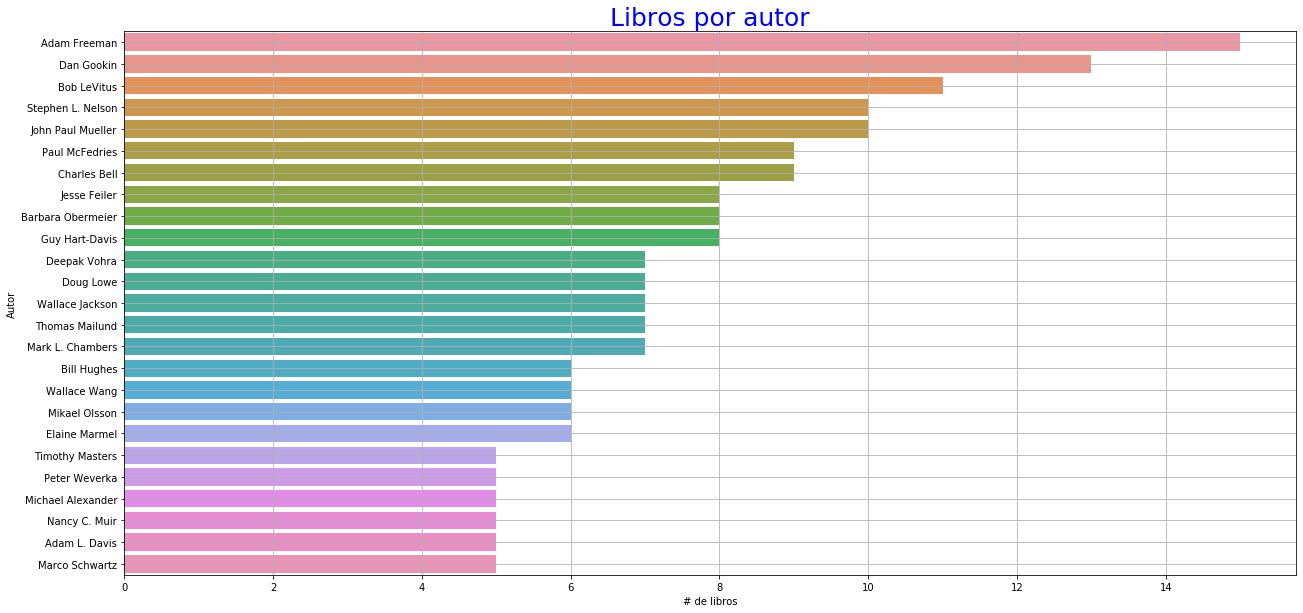

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(21,10))
sns.barplot(y=por_autor[:25].index, x=por_autor[:25])
plt.ylabel('Autor')
plt.xlabel('# de libros')
plt.grid(True)
plt.title('Libros por autor', color='b', size = 25)
plt.show()

### 2. Ver si hay duplicados por ISBN

In [46]:
isbn = df3[['isbn-10']].copy()
por_isbn = isbn['isbn-10'].value_counts()
por_isbn

1484219392    2
1785285246    2
1484223993    2
1119416876    2
1783989688    2
             ..
1119660483    1
1849512949    1
1491936169    1
1633430219    1
1484255801    1
Name: isbn-10, Length: 2959, dtype: int64

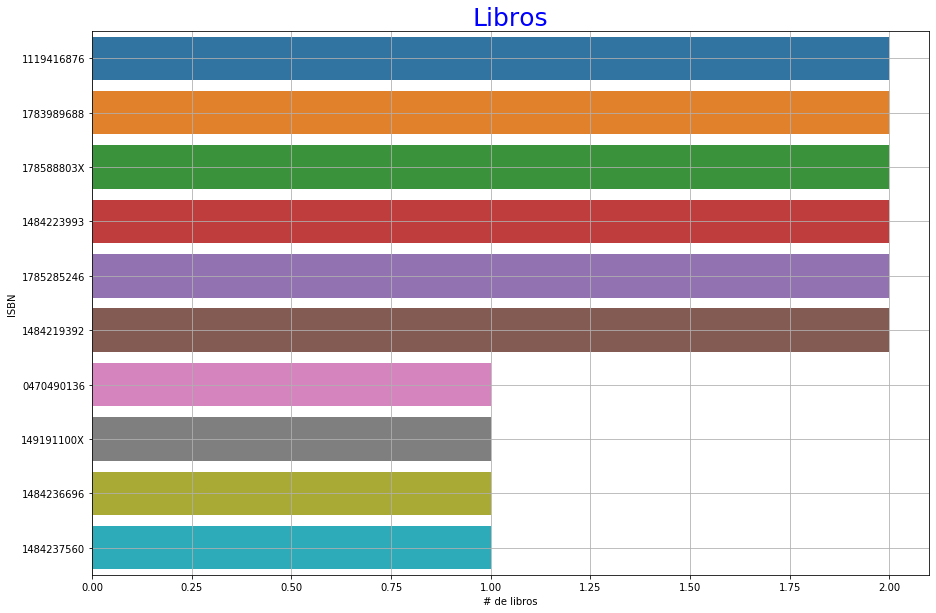

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(y=por_isbn[:10].index, x=por_isbn[:10])
plt.ylabel('ISBN')
plt.xlabel('# de libros')
plt.grid(True)
plt.title('Libros', color='b', size = 25)
plt.show()

### 3. Ver duplicados por nombre

In [47]:
nombre = df3[['nombre']].copy()
por_nombre = nombre['nombre'].value_counts()
por_nombre

Professional LAMP                                  1
Make Your Own Mandelbrot                           1
Learn Microsoft Visual Studio App Center           1
OpenNebula 3 Cloud Computing                       1
VMware vSphere 5.5 Essentials                      1
                                                  ..
Objective-C for Absolute Beginners, 4th Edition    1
Klout For Dummies                                  1
Deep Learning Cookbook                             1
Software Development From A to Z                   1
Mastering Social Media Mining with R               1
Name: nombre, Length: 2965, dtype: int64

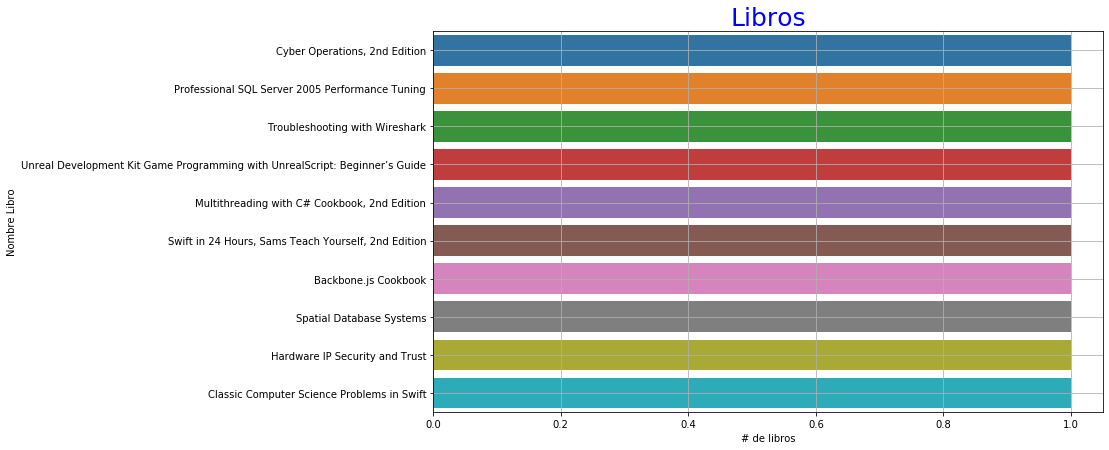

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(y=por_nombre[:10].index, x=por_nombre[:10])
plt.ylabel('Nombre Libro')
plt.xlabel('# de libros')
plt.grid(True)
plt.title('Libros', color='b', size = 25)
plt.show()

### 4. Número de libros por año

In [48]:
anio = df3[['anio']].copy()
por_anio = anio['anio'].value_counts().sort_index()
por_anio

1998      3
1999      1
2001      3
2002      5
2003      8
2004     11
2005     27
2006     29
2007     38
2008     57
2009     86
2010    116
2011    116
2012    105
2013    183
2014    176
2015    235
2016    626
2017    343
2018    313
2019    340
2020    144
Name: anio, dtype: int64

2020-09-29 22:58:27 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2020-09-29 22:58:27 [matplotlib.category] INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


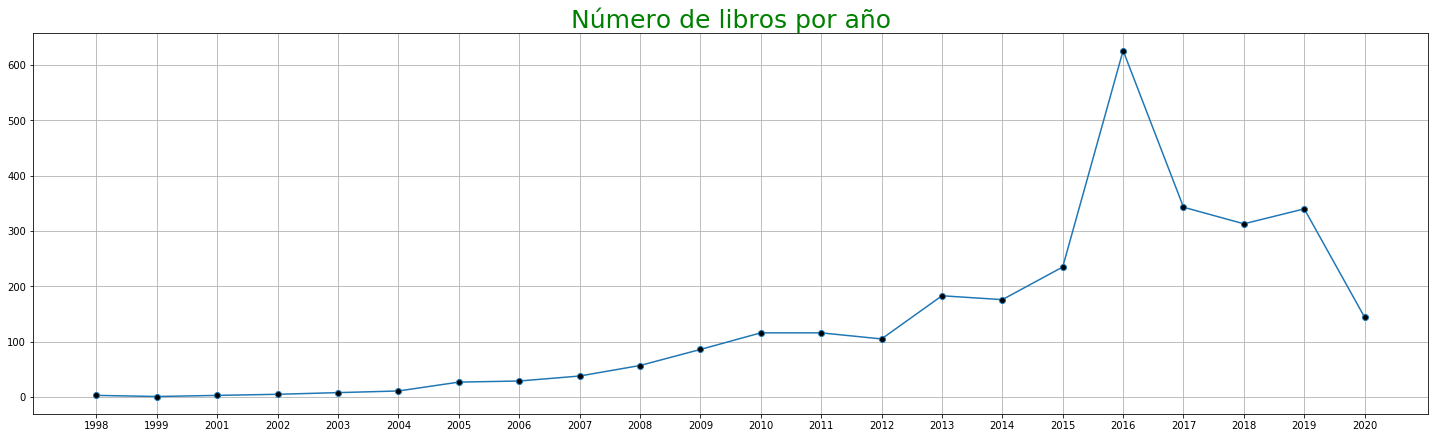

In [49]:
plt.figure(figsize=(25,7))
plt.plot(por_anio[:23].index,por_anio[:23], marker='o',  markerfacecolor='black')
plt.grid(True)
plt.title('Número de libros por año', color='g', size = 25)
plt.show()

### 5. Libros con más páginas

In [78]:
paginas = df3[['nombre','paginas']].copy()
paginas = paginas.astype({"paginas": int})
paginas = paginas.sort_values(by='paginas',ascending=False)
paginas

,nombre,paginas
511,Programming in Go,4962
2336,The Busy Coder’s Guide to Android Development,3893
1721,"Android Programming, 3rd Edition",2464
1242,Parsing with Perl 6 Regexes and Grammars,2018
1047,Pro Data Visualization using R and JavaScript,2017
...,...,...
1408,Instant Node.js Starter,48
2502,Table Layout in CSS,44
2549,Inkscape Starter,40
97,Data Mashups in R,38


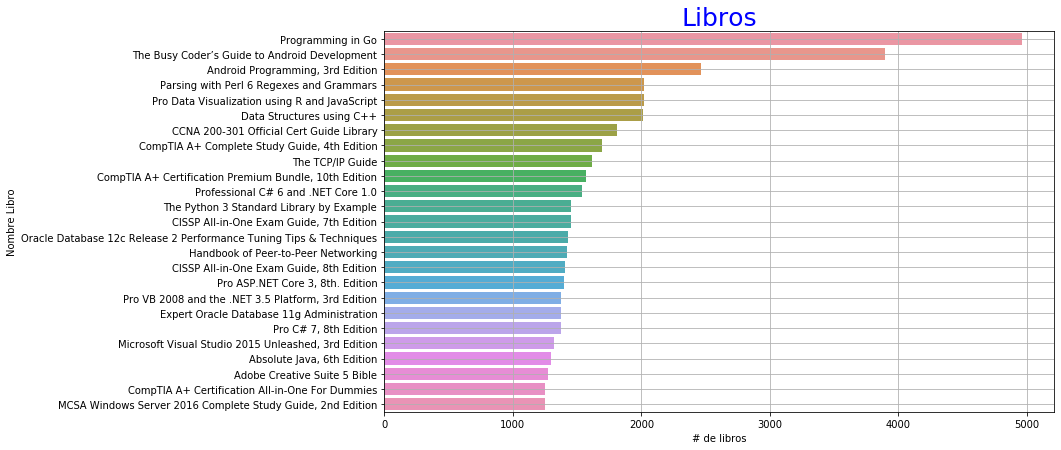

In [81]:
plt.figure(figsize=(12,7))
sns.barplot(y=paginas['nombre'][:25], x=paginas['paginas'][:25])
plt.ylabel('Nombre Libro')
plt.xlabel('# de libros')
plt.grid(True)
plt.title('Libros', color='b', size = 25)
plt.show()

### 6. Porcentaje de libros por idioma

In [85]:
lenguaje = df3[['lenguaje']].copy()
por_lenguaje = lenguaje['lenguaje'].value_counts().sort_index()
por_lenguaje

English    2965
Name: lenguaje, dtype: int64

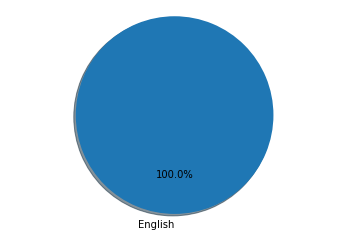

In [88]:
fig1, ax1 = plt.subplots()
labels = ['English']
ax1.pie(por_lenguaje, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

### 7. Porcentaje de libros con y sin archivo para descargar

In [5]:
tamanio = df3[['tamanio']].copy()
tamanio = tamanio["tamanio"].replace("MB", 0).astype(float)
conteo = (tamanio>0).value_counts()
porcentaje = conteo/2964
porcentaje

True     0.997301
False    0.003036
Name: tamanio, dtype: float64

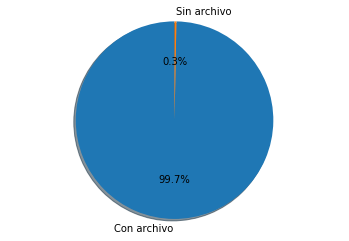

In [141]:
fig1, ax1 = plt.subplots()
labels = ['Con archivo', 'Sin archivo']
ax1.pie(porcentaje, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

### 8. Archivos por tamaño

In [27]:
tamanio_dos = pd.Series(tamanio.values,index=df3['nombre'].copy())
tamanio_dos = tamanio_dos.sort_values(ascending=False)
tamanio_dos

nombre
Foundations for Analytics with Python                               321.00
Learn FileMaker Pro 16                                              286.00
CCSP Certified Cloud Security Professional All-in-One Exam Guide    276.00
Beginning 3D Game Development with Unity                            255.00
Murach’s HTML5 and CSS3, 3rd Edition                                219.13
                                                                     ...  
How to Reduce the Cost of Software Testing                            0.00
Hadoop in Action                                                      0.00
Getting Started with Visual Studio 2019                               0.00
Digital Marketing For Dummies, 2nd Edition                            0.00
CompTIA Project+ Cert Guide                                           0.00
Length: 2965, dtype: float64

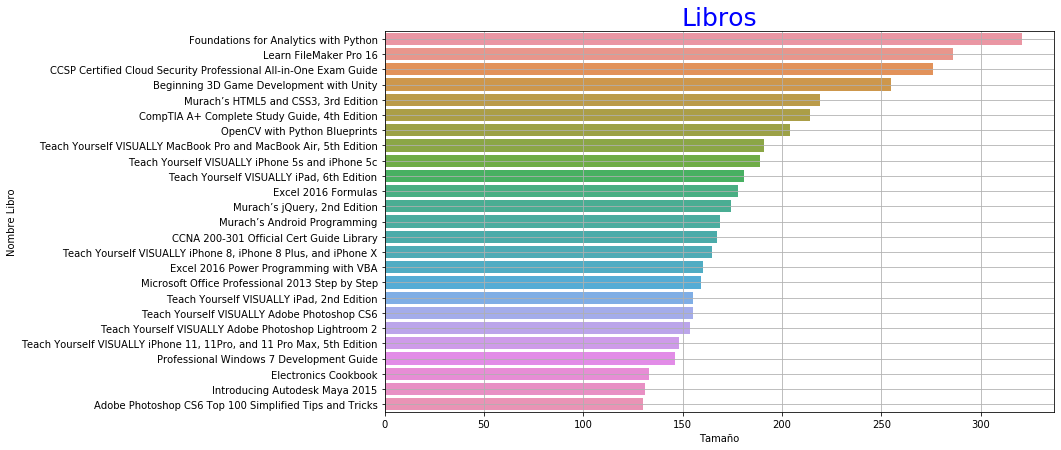

In [49]:
plt.figure(figsize=(12,7))
sns.barplot(y=tamanio_dos.index[:25], x=tamanio_dos[:25])
plt.ylabel('Nombre Libro')
plt.xlabel('Tamaño')
plt.grid(True)
plt.title('Libros', color='b', size = 25)
plt.show()

### 9. Archivos por formato

In [36]:
formato = df3[['formato']].copy()
por_formato = formato['formato'].value_counts()
por_formato

PDF           2385
PDF, ePub      463
ePub           107
PDF+Code         7
ePub, AZW3       1
ePub, Mobi       1
PDF, azw3        1
Name: formato, dtype: int64

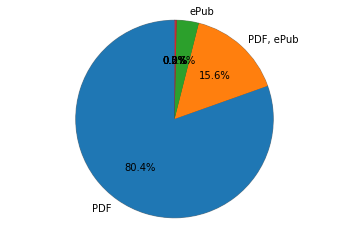

In [47]:
fig1, ax1 = plt.subplots()
labels = ['PDF', 'PDF, ePub','ePub', '','','','']
ax1.pie(por_formato, autopct='%1.1f%%', labels=labels,
        shadow=True, startangle=90, radius = 90)
ax1.axis('equal')  
plt.show()

### 10. Por categoría

In [50]:
categoria = df3[['categoria']].copy()
por_categoria = categoria['categoria'].value_counts()
por_categoria

Programming        415
Hardware & DIY     188
Java               167
Python             152
Web Development    123
                  ... 
Scala                1
ERP & CRM            1
Other                1
Backbone.js          1
Mail Servers         1
Name: categoria, Length: 86, dtype: int64

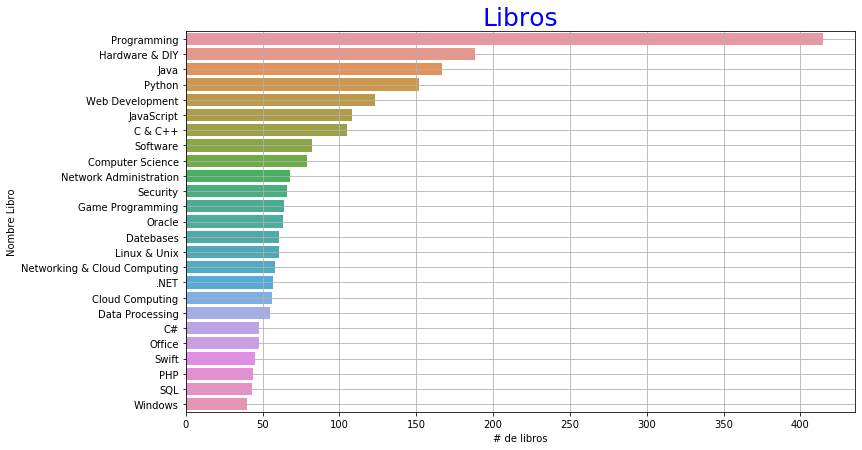

In [51]:
plt.figure(figsize=(12,7))
sns.barplot(y=por_categoria.index[:25], x=por_categoria[:25])
plt.ylabel('Nombre Libro')
plt.xlabel('# de libros')
plt.grid(True)
plt.title('Libros', color='b', size = 25)
plt.show()

In [82]:
categoria_a = df3['categoria'].copy()
anio_a = df3['anio'].copy()
anio_a

539     2019
2675    2010
2488    2016
1052    2017
2113    2016
        ... 
975     2018
157     2020
804     2018
1709    2017
1128    2018
Name: anio, Length: 2965, dtype: object